# **House Price Prediction Project**

This notebook uses machine learning techniques to predict house prices in Istanbul based on various property features.

# **1) Project Overview**

## **a. Why was this problem chosen?**

House price prediction is a critical task in the real estate sector, both for buyers and sellers. Accurate price estimation helps:

- **Buyers**: Make informed decisions and avoid overpaying
- **Sellers**: Set competitive prices for their properties  
- **Real Estate Agents**: Provide data-driven recommendations to clients
- **Investors**: Identify undervalued properties and investment opportunities

This project aims to develop a machine learning model that can predict house prices based on various property features such as location, size, age, and amenities. Understanding the factors that influence house prices is valuable for all stakeholders in the real estate market.

## **b. What machine learning techniques will be applied?**

This project will compare three different regression algorithms:

• **Random Forest Regressor**

• **K-Nearest Neighbors (KNN) Regressor**

• **Support Vector Regression (SVR)**

Each algorithm will be trained, optimized through hyperparameter tuning, and evaluated to determine which performs best for this dataset.

## **c. Summary information about the selected dataset**

This project uses a dataset of house listings in Istanbul. The dataset contains the following features:

**Location Features:**
- `neighborhood`: District in Istanbul (Besiktas, Sisli, Uskudar, Kadikoy, Sariyer, Atasehir, Umraniye, Kartal, Fatih)
- `distance_metro_km`: Distance to nearest metro station (km)
- `distance_park_km`: Distance to nearest park (km)
- `distance_center_km`: Distance to city center (km)

**Property Characteristics:**
- `building_type`: Type of building (apartment, duplex, detached, residence)
- `condition`: Physical condition (excellent, good, fair, poor)
- `energy_rating`: Energy efficiency rating (A, B, C, D)
- `area_sqm`: Total living area (square meters)
- `balcony_area_sqm`: Balcony area (square meters)
- `lot_size_sqm`: Lot/land size (square meters)
- `age_years`: Age of the building (years)

**Room Information:**
- `bedrooms`: Number of bedrooms
- `bathrooms`: Number of bathrooms
- `living_rooms`: Number of living rooms
- `rooms_total`: Total number of rooms
- `floor`: Floor number

**Amenities (Binary - 0/1):**
- `has_elevator`: Presence of elevator
- `has_parking`: Presence of parking space
- `has_ac`: Presence of air conditioning
- `has_sea_view`: Presence of sea view

**Environmental Factors:**
- `noise_level_db`: Ambient noise level (decibels)
- `air_quality_index`: Air quality measurement

**Financial & Other:**
- `monthly_hoa_fee`: Monthly homeowners association fee (TRY)
- `listing_year`: Year property was listed
- `description_length`: Length of listing description (characters)

**Target Variable:**
- `price`: House price (TRY - Turkish Lira)

# **2) Exploratory Data Analysis (EDA)**

## **a. Information about dataset dimensions**

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [126]:
# Load datasets
df_train = pd.read_csv('housing_train.csv')
df_test = pd.read_csv('housing_test.csv')

print("="*60)
print("DATASET DIMENSIONS")
print("="*60)
print(f"Training set dimensions (rows, columns): {df_train.shape}")
print(f"Test set dimensions (rows, columns): {df_test.shape}")
print(f"\nTotal training samples: {df_train.shape[0]:,}")
print(f"Total test samples: {df_test.shape[0]:,}")
print(f"Total features: {df_train.shape[1]}")
print(f"\nTotal dataset size: {df_train.shape[0] + df_test.shape[0]:,} samples")

DATASET DIMENSIONS
Training set dimensions (rows, columns): (16000, 27)
Test set dimensions (rows, columns): (4000, 28)

Total training samples: 16,000
Total test samples: 4,000
Total features: 27

Total dataset size: 20,000 samples


In [127]:
# Display first few rows
print("\nFirst 5 rows of the training dataset:")
df_train.head()


First 5 rows of the training dataset:


,listing_id,neighborhood,building_type,condition,energy_rating,area_sqm,balcony_area_sqm,lot_size_sqm,bedrooms,bathrooms,...,distance_park_km,distance_center_km,noise_level_db,air_quality_index,monthly_hoa_fee,age_years,listing_year,description_length,rooms_total,price
0,16529,Uskudar,apartment,fair,A,173.9,NaN,NaN,3,1,...,0.59,1.85,55.7,70.0,605.0,38,2025,283,4,229830
1,5187,Besiktas,duplex,poor,D,141.2,8.3,0.0,1,4,...,0.10,6.31,69.2,80.0,207.0,7,2025,201,3,432643
2,3488,Sariyer,detached,poor,A,203.7,10.3,0.0,3,1,...,0.31,2.69,68.9,87.0,299.0,59,2025,374,4,545457
3,5046,Besiktas,apartment,fair,C,193.1,6.1,0.0,6,3,...,0.73,2.32,51.3,106.0,NaN,53,2024,90,7,416827
4,9166,Uskudar,apartment,good,A,150.1,8.1,NaN,6,1,...,0.71,0.50,36.2,87.0,12.0,29,2025,205,8,228443


## **b. Explanation of each feature and its type (numeric, categorical, etc.)**

In [128]:
print("="*60)
print("DATASET INFORMATION")
print("="*60)
df_train.info()

print("\n" + "="*60)
print("DATA TYPES")
print("="*60)
print(df_train.dtypes)

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          16000 non-null  int64  
 1   neighborhood        16000 non-null  object 
 2   building_type       16000 non-null  object 
 3   condition           16000 non-null  object 
 4   energy_rating       15504 non-null  object 
 5   area_sqm            16000 non-null  float64
 6   balcony_area_sqm    11982 non-null  float64
 7   lot_size_sqm        10384 non-null  float64
 8   bedrooms            16000 non-null  int64  
 9   bathrooms           16000 non-null  int64  
 10  living_rooms        16000 non-null  int64  
 11  floor               16000 non-null  int64  
 12  has_elevator        16000 non-null  int64  
 13  has_parking         16000 non-null  int64  
 14  has_ac              16000 non-null  int64  
 15  has_sea_view        16000 non-nul

In [129]:
# Separate features by type
numeric_features = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_train.select_dtypes(include=['object']).columns.tolist()

# Remove ID and target from feature lists
if 'listing_id' in numeric_features:
    numeric_features.remove('listing_id')
if 'price' in numeric_features:
    numeric_features.remove('price')

print("="*60)
print("FEATURE CLASSIFICATION")
print("="*60)
print(f"\nNumeric Features ({len(numeric_features)}):")
print("-" * 40)
for feat in numeric_features:
    print(f"  • {feat}")

print(f"\nCategorical Features ({len(categorical_features)}):")
print("-" * 40)
for feat in categorical_features:
    print(f"  • {feat}")
    
print(f"\nTarget Variable:")
print("-" * 40)
print("  • price (Continuous)")

FEATURE CLASSIFICATION

Numeric Features (21):
----------------------------------------
  • area_sqm
  • balcony_area_sqm
  • lot_size_sqm
  • bedrooms
  • bathrooms
  • living_rooms
  • floor
  • has_elevator
  • has_parking
  • has_ac
  • has_sea_view
  • distance_metro_km
  • distance_park_km
  • distance_center_km
  • noise_level_db
  • air_quality_index
  • monthly_hoa_fee
  • age_years
  • listing_year
  • description_length
  • rooms_total

Categorical Features (4):
----------------------------------------
  • neighborhood
  • building_type
  • condition
  • energy_rating

Target Variable:
----------------------------------------
  • price (Continuous)


**Feature Type Explanation:**

**Numeric Features - Continuous:**
- **Area measurements**: `area_sqm`, `balcony_area_sqm`, `lot_size_sqm`
- **Distance measurements**: `distance_metro_km`, `distance_park_km`, `distance_center_km`
- **Environmental**: `noise_level_db`, `air_quality_index`
- **Financial**: `monthly_hoa_fee`
- **Other**: `age_years`, `description_length`

**Numeric Features - Discrete:**
- **Room counts**: `bedrooms`, `bathrooms`, `living_rooms`, `rooms_total`
- **Building info**: `floor`
- **Binary amenities**: `has_elevator`, `has_parking`, `has_ac`, `has_sea_view` (0 or 1)
- **Temporal**: `listing_year`

**Categorical Features:**
- **`neighborhood`**: Nominal (9 districts in Istanbul)
- **`building_type`**: Nominal (apartment, duplex, detached, residence)
- **`condition`**: Ordinal (excellent > good > fair > poor)
- **`energy_rating`**: Ordinal (A > B > C > D)

**Target Variable:**
- **`price`**: Continuous numeric value representing house price in Turkish Lira (TRY)

## **c. Descriptive statistical information for each feature (min, max, std, avg, 25% percentile, etc.)**

In [130]:
print("="*80)
print("DESCRIPTIVE STATISTICS FOR NUMERIC FEATURES")
print("="*80)
df_train.describe()

DESCRIPTIVE STATISTICS FOR NUMERIC FEATURES


,listing_id,area_sqm,balcony_area_sqm,lot_size_sqm,bedrooms,bathrooms,living_rooms,floor,has_elevator,has_parking,...,distance_park_km,distance_center_km,noise_level_db,air_quality_index,monthly_hoa_fee,age_years,listing_year,description_length,rooms_total,price
count,16000.000000,16000.000000,11982.000000,10384.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,...,15217.000000,16000.000000,14701.000000,14357.000000,14045.000000,16000.000000,16000.000000,16000.000000,16000.000000,1.600000e+04
mean,10032.049625,142.833050,8.014889,22.254921,3.507062,2.487500,1.498563,12.072688,0.493563,0.497812,...,1.212512,3.636050,57.917285,79.982935,199.354575,29.657187,2024.100563,220.613375,5.009875,2.782301e+05
std,5779.010589,51.359361,3.937443,84.132905,1.717122,1.116656,0.500014,7.229336,0.499974,0.500011,...,0.843315,2.710589,8.002819,20.121782,142.676707,17.330611,0.701324,90.006727,1.798779,1.440841e+05
min,1.000000,35.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.020000,0.500000,35.000000,20.000000,1.000000,0.000000,2023.000000,10.000000,2.000000,5.000000e+04
25%,5022.750000,106.200000,5.300000,0.000000,2.000000,1.000000,1.000000,6.000000,0.000000,0.000000,...,0.580000,1.640000,52.500000,66.000000,94.000000,15.000000,2024.000000,158.000000,3.000000,1.768930e+05
50%,10072.500000,134.300000,8.000000,0.000000,4.000000,2.000000,1.000000,12.000000,0.000000,0.000000,...,1.030000,2.990000,57.900000,80.000000,167.000000,30.000000,2024.000000,221.000000,5.000000,2.474450e+05
75%,15040.250000,170.100000,10.700000,0.000000,5.000000,3.000000,2.000000,18.000000,1.000000,1.000000,...,1.640000,4.880000,63.300000,94.000000,269.000000,45.000000,2025.000000,282.000000,7.000000,3.452325e+05
max,20000.000000,450.000000,23.300000,1216.000000,6.000000,4.000000,2.000000,24.000000,1.000000,1.000000,...,7.070000,28.960000,90.000000,155.000000,1474.000000,68.000000,2025.000000,557.000000,9.000000,1.807166e+06


In [131]:
# Detailed statistics for target variable (price)
print("="*60)
print("DETAILED STATISTICS FOR TARGET VARIABLE: PRICE")
print("="*60)
print(f"Mean:              {df_train['price'].mean():>15,.2f} TRY")
print(f"Median:            {df_train['price'].median():>15,.2f} TRY")
print(f"Standard Dev:      {df_train['price'].std():>15,.2f} TRY")
print(f"Minimum:           {df_train['price'].min():>15,.2f} TRY")
print(f"Maximum:           {df_train['price'].max():>15,.2f} TRY")
print(f"\nQuartiles:")
print(f"  25th Percentile: {df_train['price'].quantile(0.25):>15,.2f} TRY")
print(f"  50th Percentile: {df_train['price'].quantile(0.50):>15,.2f} TRY")
print(f"  75th Percentile: {df_train['price'].quantile(0.75):>15,.2f} TRY")
print(f"\nSpread:")
print(f"  Range:           {df_train['price'].max() - df_train['price'].min():>15,.2f} TRY")
print(f"  IQR:             {df_train['price'].quantile(0.75) - df_train['price'].quantile(0.25):>15,.2f} TRY")
print(f"\nDistribution Shape:")
print(f"  Skewness:        {df_train['price'].skew():>15.3f}")
print(f"  Kurtosis:        {df_train['price'].kurtosis():>15.3f}")

DETAILED STATISTICS FOR TARGET VARIABLE: PRICE
Mean:                   278,230.09 TRY
Median:                 247,445.00 TRY
Standard Dev:           144,084.06 TRY
Minimum:                 50,000.00 TRY
Maximum:              1,807,166.00 TRY

Quartiles:
  25th Percentile:      176,893.00 TRY
  50th Percentile:      247,445.00 TRY
  75th Percentile:      345,232.50 TRY

Spread:
  Range:              1,757,166.00 TRY
  IQR:                  168,339.50 TRY

Distribution Shape:
  Skewness:                  1.664
  Kurtosis:                  5.231


In [132]:
# Statistics for categorical features
print("="*60)
print("CATEGORICAL FEATURES - VALUE COUNTS")
print("="*60)

for col in categorical_features:
    print(f"\n{col.upper()}:")
    print("-" * 40)
    print(df_train[col].value_counts())
    print(f"\nUnique values: {df_train[col].nunique()}")
    print(f"Most common: {df_train[col].mode()[0]} ({df_train[col].value_counts().iloc[0]} occurrences)")
    print("=" * 60)

CATEGORICAL FEATURES - VALUE COUNTS

NEIGHBORHOOD:
----------------------------------------
neighborhood
Umraniye    1893
Maltepe     1598
Kartal      1551
Kadikoy     1391
Besiktas    1316
Atasehir    1301
Beyoglu     1295
Sisli       1293
Uskudar     1285
Fatih       1270
Bakirkoy    1006
Sariyer      801
Name: count, dtype: int64

Unique values: 12
Most common: Umraniye (1893 occurrences)

BUILDING_TYPE:
----------------------------------------
building_type
apartment    8774
residence    3187
duplex       1862
detached     1366
loft          811
Name: count, dtype: int64

Unique values: 5
Most common: apartment (8774 occurrences)

CONDITION:
----------------------------------------
condition
good         5691
fair         5610
poor         2374
excellent    2325
Name: count, dtype: int64

Unique values: 4
Most common: good (5691 occurrences)

ENERGY_RATING:
----------------------------------------
energy_rating
B    5489
C    4643
A    3848
D    1524
Name: count, dtype: int64

Uniq

## **d. Important features should be visualized with different types of graphs. At least 5 graphs should be used.**

### **Graphs 1-2: Target Variable (Price) Distribution**

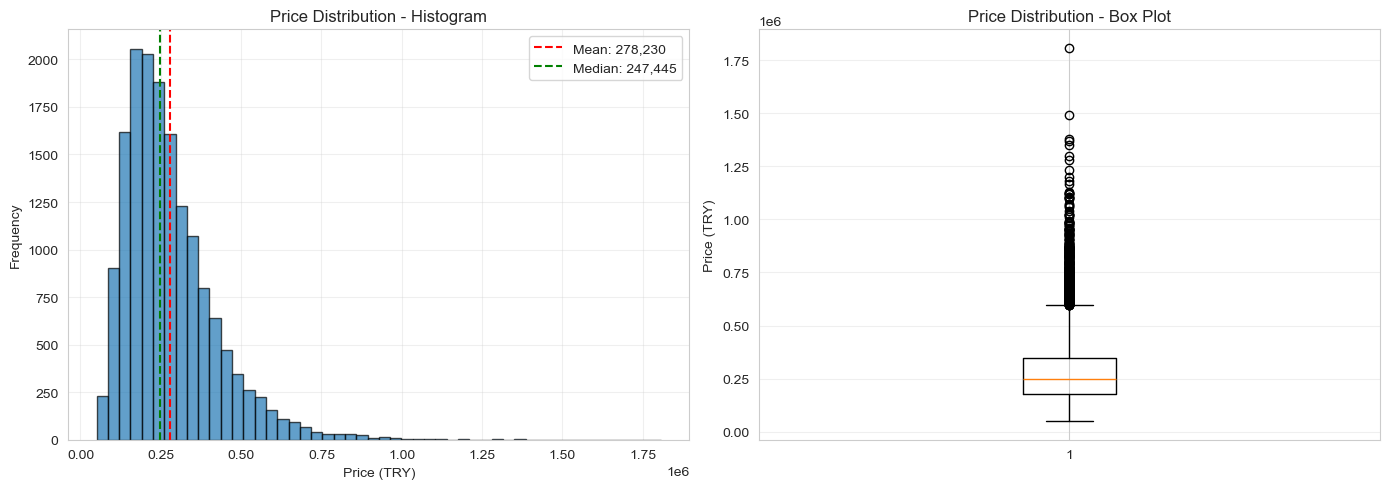

Price distribution shows skewness: 1.66
Positive skewness indicates a right-tailed distribution with some high-value properties.


In [133]:
# Price distribution visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df_train['price'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Price (TRY)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution - Histogram')
axes[0].axvline(df_train['price'].mean(), color='red', linestyle='--', label=f'Mean: {df_train["price"].mean():,.0f}')
axes[0].axvline(df_train['price'].median(), color='green', linestyle='--', label=f'Median: {df_train["price"].median():,.0f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df_train['price'], vert=True)
axes[1].set_ylabel('Price (TRY)')
axes[1].set_title('Price Distribution - Box Plot')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"Price distribution shows skewness: {df_train['price'].skew():.2f}")
print("Positive skewness indicates a right-tailed distribution with some high-value properties.")

### **Graph 3-5: Categorical Variable Analysis**

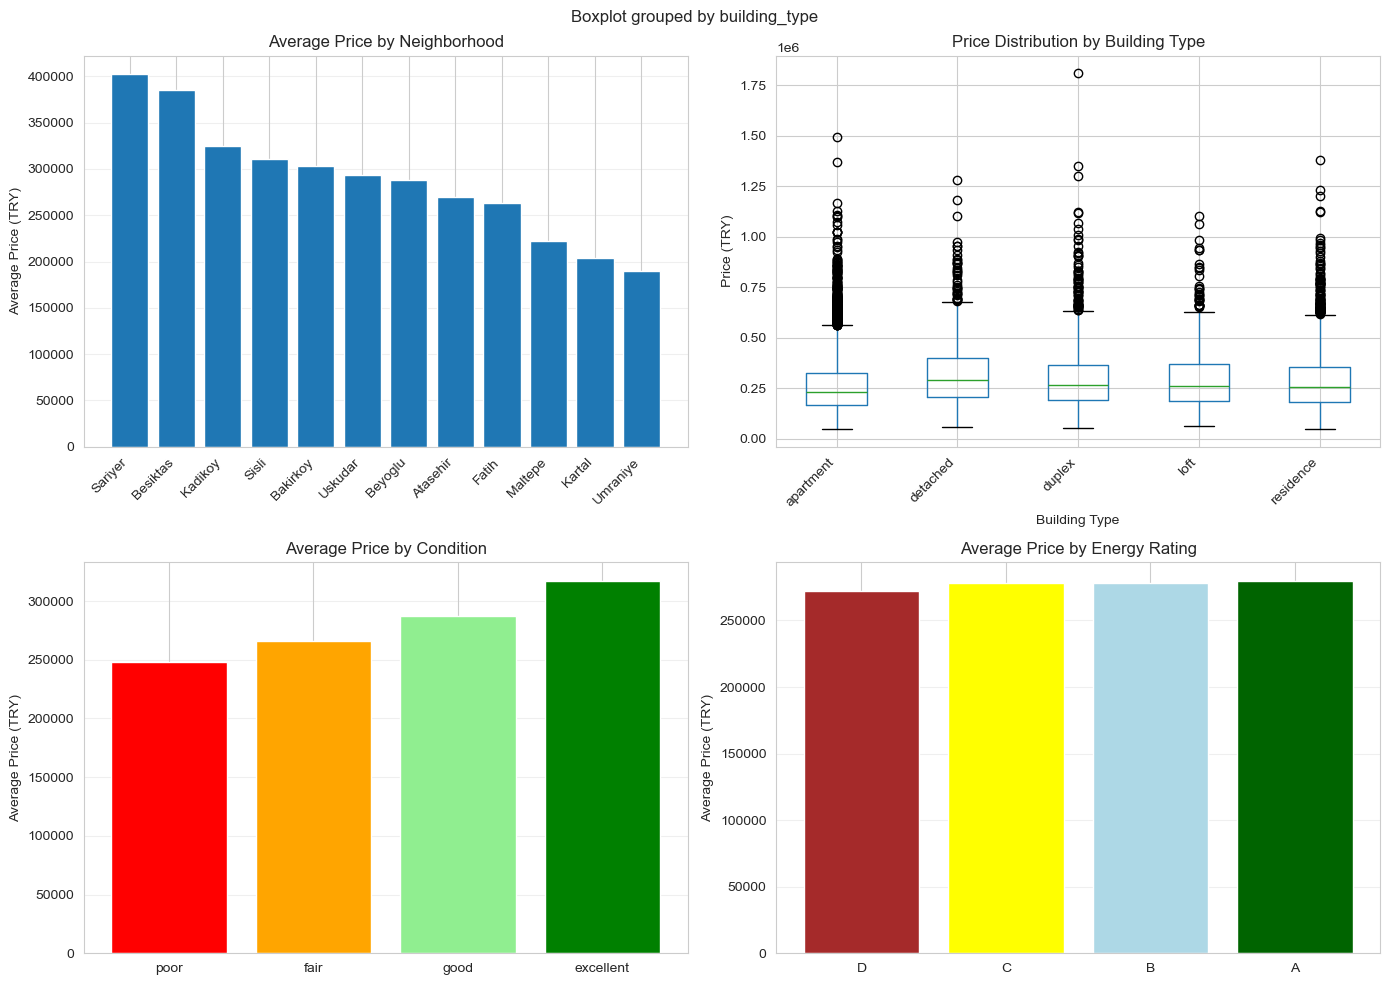

In [134]:
# Categorical variables vs Price
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Average price by neighborhood
neighborhood_price = df_train.groupby('neighborhood')['price'].mean().sort_values(ascending=False)
axes[0, 0].bar(range(len(neighborhood_price)), neighborhood_price.values)
axes[0, 0].set_xticks(range(len(neighborhood_price)))
axes[0, 0].set_xticklabels(neighborhood_price.index, rotation=45, ha='right')
axes[0, 0].set_ylabel('Average Price (TRY)')
axes[0, 0].set_title('Average Price by Neighborhood')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# 2. Building type vs Price
df_train.boxplot(column='price', by='building_type', ax=axes[0, 1])
axes[0, 1].set_xlabel('Building Type')
axes[0, 1].set_ylabel('Price (TRY)')
axes[0, 1].set_title('Price Distribution by Building Type')
plt.sca(axes[0, 1])
plt.xticks(rotation=45, ha='right')

# 3. Condition vs Price
condition_order = ['poor', 'fair', 'good', 'excellent']
condition_price = df_train.groupby('condition')['price'].mean().reindex(condition_order)
axes[1, 0].bar(range(len(condition_price)), condition_price.values, color=['red', 'orange', 'lightgreen', 'green'])
axes[1, 0].set_xticks(range(len(condition_price)))
axes[1, 0].set_xticklabels(condition_price.index)
axes[1, 0].set_ylabel('Average Price (TRY)')
axes[1, 0].set_title('Average Price by Condition')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Energy rating vs Price
energy_order = ['D', 'C', 'B', 'A']
energy_price = df_train.groupby('energy_rating')['price'].mean().reindex(energy_order)
axes[1, 1].bar(range(len(energy_price)), energy_price.values, color=['brown', 'yellow', 'lightblue', 'darkgreen'])
axes[1, 1].set_xticks(range(len(energy_price)))
axes[1, 1].set_xticklabels(energy_price.index)
axes[1, 1].set_ylabel('Average Price (TRY)')
axes[1, 1].set_title('Average Price by Energy Rating')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### **Graphs 6-10: Numerical Variables vs Price**

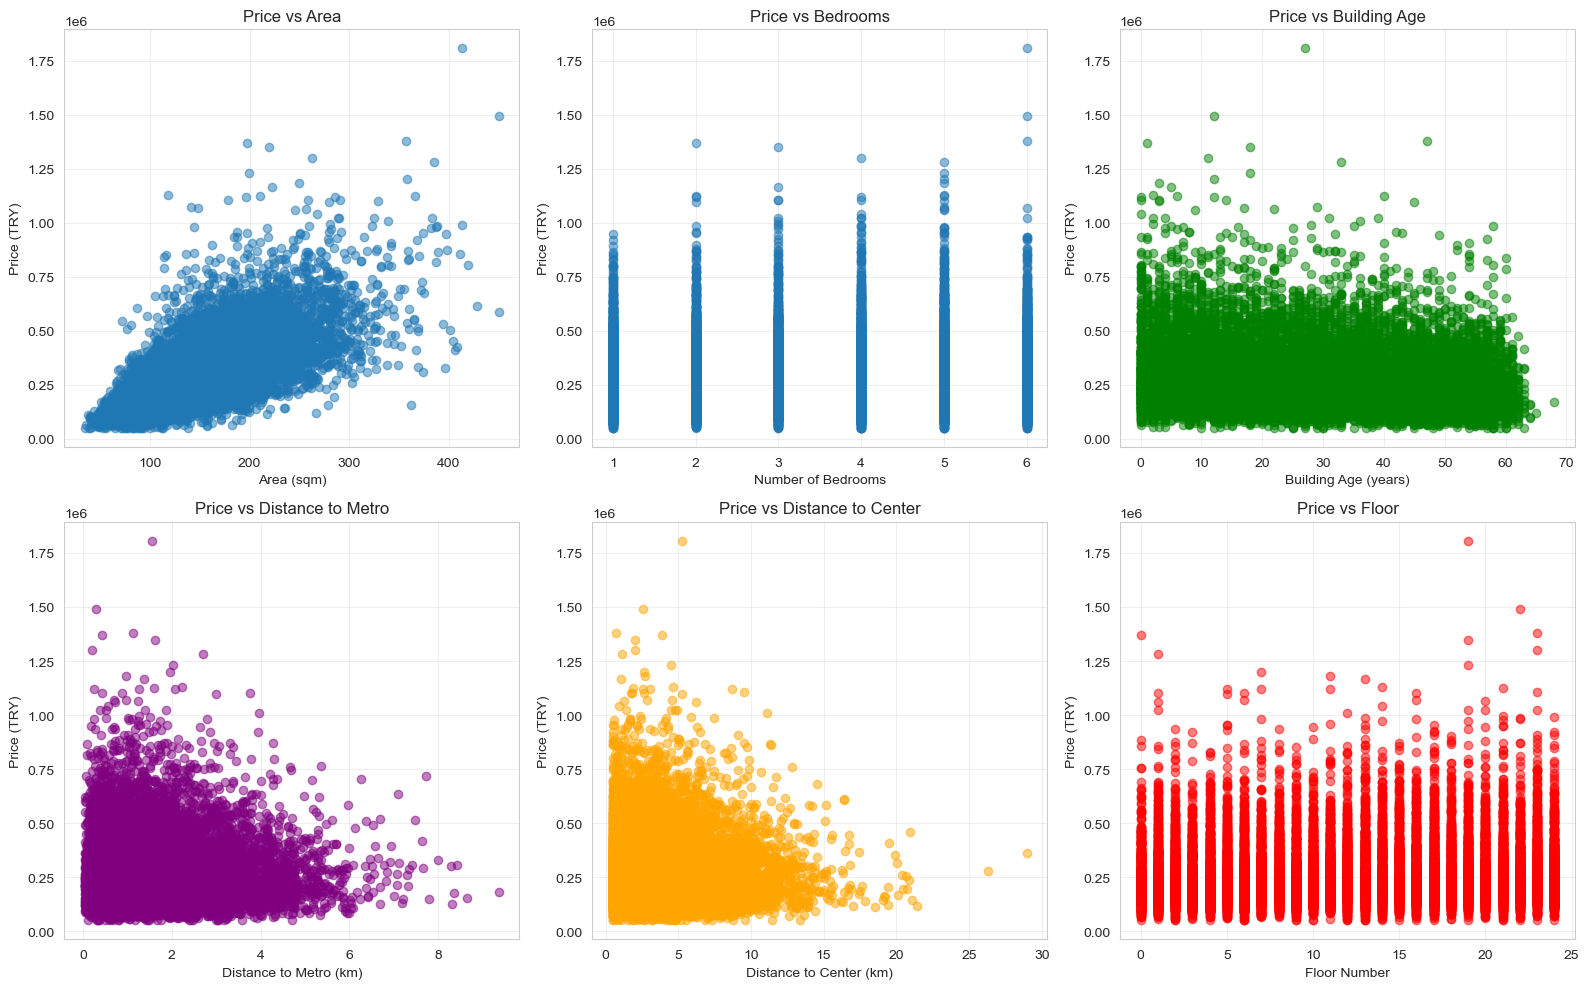

In [135]:
# Scatter plots: Numerical features vs Price
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 1. Area vs Price
axes[0, 0].scatter(df_train['area_sqm'], df_train['price'], alpha=0.5)
axes[0, 0].set_xlabel('Area (sqm)')
axes[0, 0].set_ylabel('Price (TRY)')
axes[0, 0].set_title('Price vs Area')
axes[0, 0].grid(True, alpha=0.3)

# 2. Bedrooms vs Price
axes[0, 1].scatter(df_train['bedrooms'], df_train['price'], alpha=0.5)
axes[0, 1].set_xlabel('Number of Bedrooms')
axes[0, 1].set_ylabel('Price (TRY)')
axes[0, 1].set_title('Price vs Bedrooms')
axes[0, 1].grid(True, alpha=0.3)

# 3. Age vs Price
axes[0, 2].scatter(df_train['age_years'], df_train['price'], alpha=0.5, color='green')
axes[0, 2].set_xlabel('Building Age (years)')
axes[0, 2].set_ylabel('Price (TRY)')
axes[0, 2].set_title('Price vs Building Age')
axes[0, 2].grid(True, alpha=0.3)

# 4. Distance to Metro vs Price
axes[1, 0].scatter(df_train['distance_metro_km'], df_train['price'], alpha=0.5, color='purple')
axes[1, 0].set_xlabel('Distance to Metro (km)')
axes[1, 0].set_ylabel('Price (TRY)')
axes[1, 0].set_title('Price vs Distance to Metro')
axes[1, 0].grid(True, alpha=0.3)

# 5. Distance to Center vs Price
axes[1, 1].scatter(df_train['distance_center_km'], df_train['price'], alpha=0.5, color='orange')
axes[1, 1].set_xlabel('Distance to Center (km)')
axes[1, 1].set_ylabel('Price (TRY)')
axes[1, 1].set_title('Price vs Distance to Center')
axes[1, 1].grid(True, alpha=0.3)

# 6. Floor vs Price
axes[1, 2].scatter(df_train['floor'], df_train['price'], alpha=0.5, color='red')
axes[1, 2].set_xlabel('Floor Number')
axes[1, 2].set_ylabel('Price (TRY)')
axes[1, 2].set_title('Price vs Floor')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## **f. Correlation matrix**

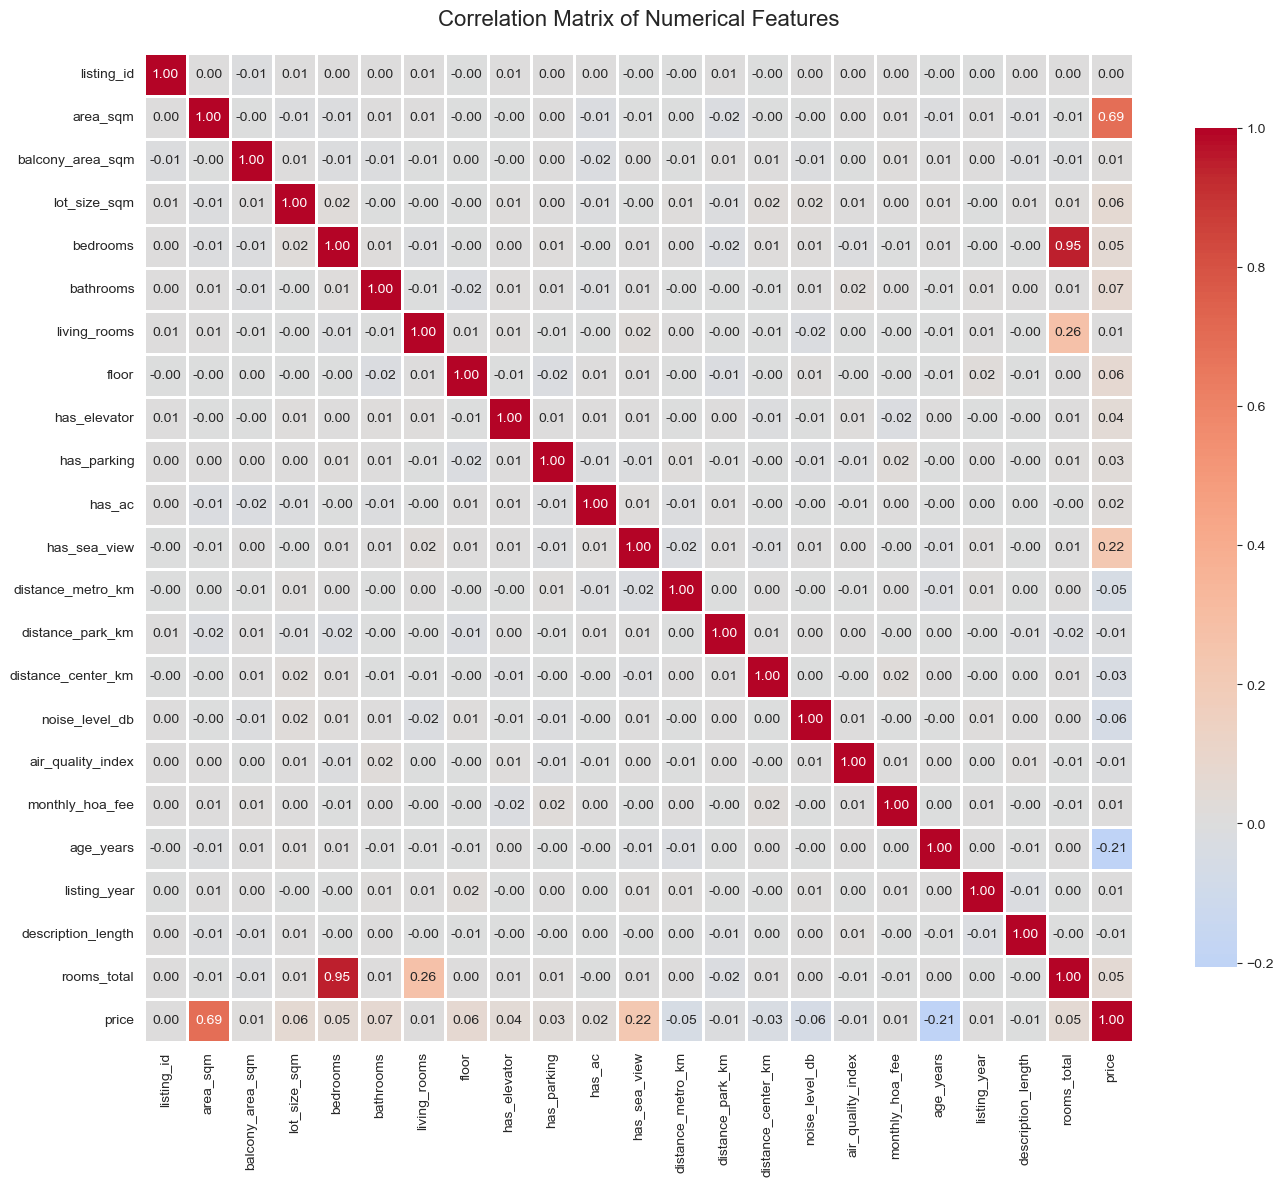

In [136]:
# Correlation matrix for numerical features
numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df_train[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [137]:
# Correlation with target variable (price)
price_corr = correlation_matrix['price'].sort_values(ascending=False)
print("="*60)
print("CORRELATION WITH PRICE (Target Variable)")
print("="*60)
print(price_corr)

print("\n" + "="*60)
print("TOP 10 FEATURES MOST CORRELATED WITH PRICE")
print("="*60)
for i, (feature, corr) in enumerate(price_corr[1:11].items(), 1):
    print(f"{i:2d}. {feature:25s} : {corr:6.3f}")

CORRELATION WITH PRICE (Target Variable)
price                 1.000000
area_sqm              0.691126
has_sea_view          0.220219
bathrooms             0.070702
floor                 0.063928
lot_size_sqm          0.059413
bedrooms              0.053867
rooms_total           0.053524
has_elevator          0.039266
has_parking           0.033499
has_ac                0.018827
balcony_area_sqm      0.014137
listing_year          0.009062
monthly_hoa_fee       0.007628
living_rooms          0.006574
listing_id            0.003162
description_length   -0.005415
air_quality_index    -0.008481
distance_park_km     -0.012604
distance_center_km   -0.033161
distance_metro_km    -0.047265
noise_level_db       -0.057769
age_years            -0.206304
Name: price, dtype: float64

TOP 10 FEATURES MOST CORRELATED WITH PRICE
 1. area_sqm                  :  0.691
 2. has_sea_view              :  0.220
 3. bathrooms                 :  0.071
 4. floor                     :  0.064
 5. lot_size_sqm  

## **g. Hypothesis Test: Are houses with sea view more expensive?**

We will conduct a t-test to determine if there is a statistically significant difference between prices of houses with and without sea view.

**Null Hypothesis (H0)**: There is no significant difference in prices between houses with and without sea view.

**Alternative Hypothesis (H1)**: Houses with sea view are significantly more expensive than those without.

In [138]:
from scipy.stats import ttest_ind

# Separate prices by sea view
sea_view_yes = df_train[df_train['has_sea_view'] == 1]['price']
sea_view_no = df_train[df_train['has_sea_view'] == 0]['price']

print("="*60)
print("HYPOTHESIS TEST: SEA VIEW EFFECT ON PRICE")
print("="*60)
print(f"\nHouses WITH sea view:")
print(f"  Count: {len(sea_view_yes)}")
print(f"  Mean price: {sea_view_yes.mean():,.2f} TRY")
print(f"  Median price: {sea_view_yes.median():,.2f} TRY")
print(f"  Std Dev: {sea_view_yes.std():,.2f} TRY")

print(f"\nHouses WITHOUT sea view:")
print(f"  Count: {len(sea_view_no)}")
print(f"  Mean price: {sea_view_no.mean():,.2f} TRY")
print(f"  Median price: {sea_view_no.median():,.2f} TRY")
print(f"  Std Dev: {sea_view_no.std():,.2f} TRY")

# Perform t-test
t_statistic, p_value = ttest_ind(sea_view_yes, sea_view_no)

print(f"\n{'='*60}")
print("T-TEST RESULTS")
print("="*60)
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.6f}")

alpha = 0.05
if p_value < alpha:
    print(f"\n✓ REJECT NULL HYPOTHESIS (p < {alpha})")
    print("Conclusion: Houses with sea view are SIGNIFICANTLY more expensive.")
    price_diff = sea_view_yes.mean() - sea_view_no.mean()
    price_diff_pct = (price_diff / sea_view_no.mean()) * 100
    print(f"\nPrice difference: {price_diff:,.2f} TRY ({price_diff_pct:.1f}% higher)")
else:
    print(f"\n✗ FAIL TO REJECT NULL HYPOTHESIS (p >= {alpha})")
    print("Conclusion: No significant price difference based on sea view.")

HYPOTHESIS TEST: SEA VIEW EFFECT ON PRICE

Houses WITH sea view:
  Count: 7955
  Mean price: 310,138.05 TRY
  Median price: 276,335.00 TRY
  Std Dev: 156,852.21 TRY

Houses WITHOUT sea view:
  Count: 8045
  Mean price: 246,679.08 TRY
  Median price: 220,033.00 TRY
  Std Dev: 122,314.94 TRY

T-TEST RESULTS
t-statistic: 28.5549
p-value: 0.000000

✓ REJECT NULL HYPOTHESIS (p < 0.05)
Conclusion: Houses with sea view are SIGNIFICANTLY more expensive.

Price difference: 63,458.97 TRY (25.7% higher)


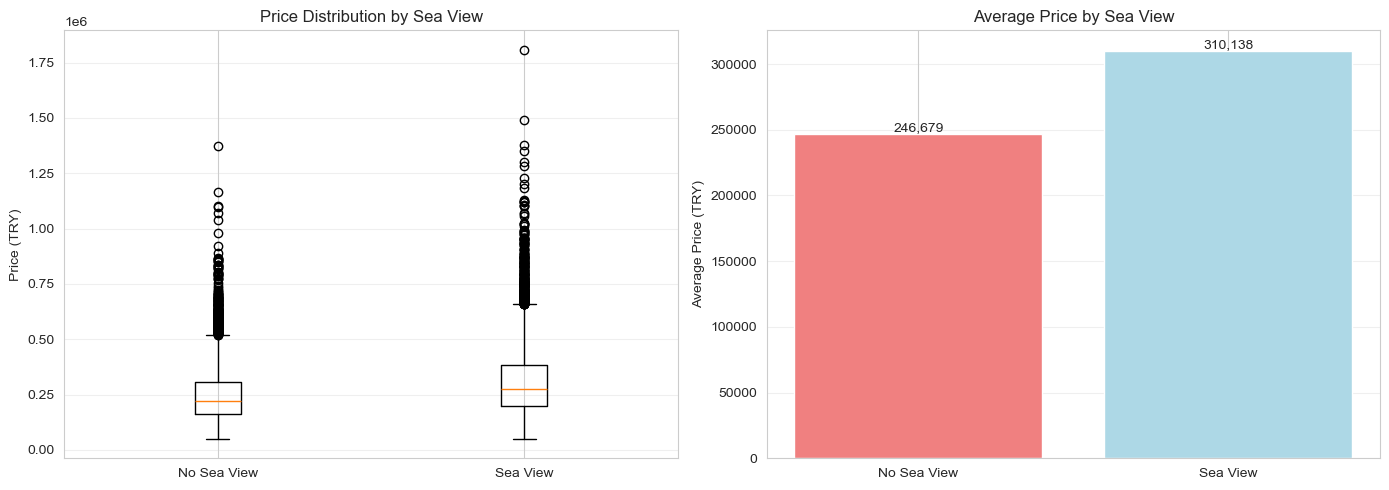

In [139]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
data_to_plot = [sea_view_no, sea_view_yes]
axes[0].boxplot(data_to_plot, labels=['No Sea View', 'Sea View'])
axes[0].set_ylabel('Price (TRY)')
axes[0].set_title('Price Distribution by Sea View')
axes[0].grid(True, alpha=0.3, axis='y')

# Bar plot of means
means = [sea_view_no.mean(), sea_view_yes.mean()]
axes[1].bar(['No Sea View', 'Sea View'], means, color=['lightcoral', 'lightblue'])
axes[1].set_ylabel('Average Price (TRY)')
axes[1].set_title('Average Price by Sea View')
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, v in enumerate(means):
    axes[1].text(i, v, f'{v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# **3) Data Preprocessing**

## **a. Missing values in the dataset should be identified. For each feature, the number (or percentage) of missing values should be shown.**

In [140]:
# Check for missing values
missing_values = df_train.isnull().sum()
missing_percentage = (df_train.isnull().sum() / len(df_train)) * 100

# Create DataFrame for better visualization
missing_df = pd.DataFrame({
    'Feature': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
})

# Filter only features with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print("="*70)
print("MISSING VALUES ANALYSIS")
print("="*70)
print(missing_df.to_string(index=False))
print(f"\nTotal features with missing values: {len(missing_df)}")
print(f"Total missing values: {missing_values.sum():,}")

MISSING VALUES ANALYSIS
          Feature  Missing Count  Missing Percentage
     lot_size_sqm           5616            35.10000
 balcony_area_sqm           4018            25.11250
  monthly_hoa_fee           1955            12.21875
air_quality_index           1643            10.26875
   noise_level_db           1299             8.11875
distance_metro_km            791             4.94375
 distance_park_km            783             4.89375
    energy_rating            496             3.10000

Total features with missing values: 8
Total missing values: 16,601


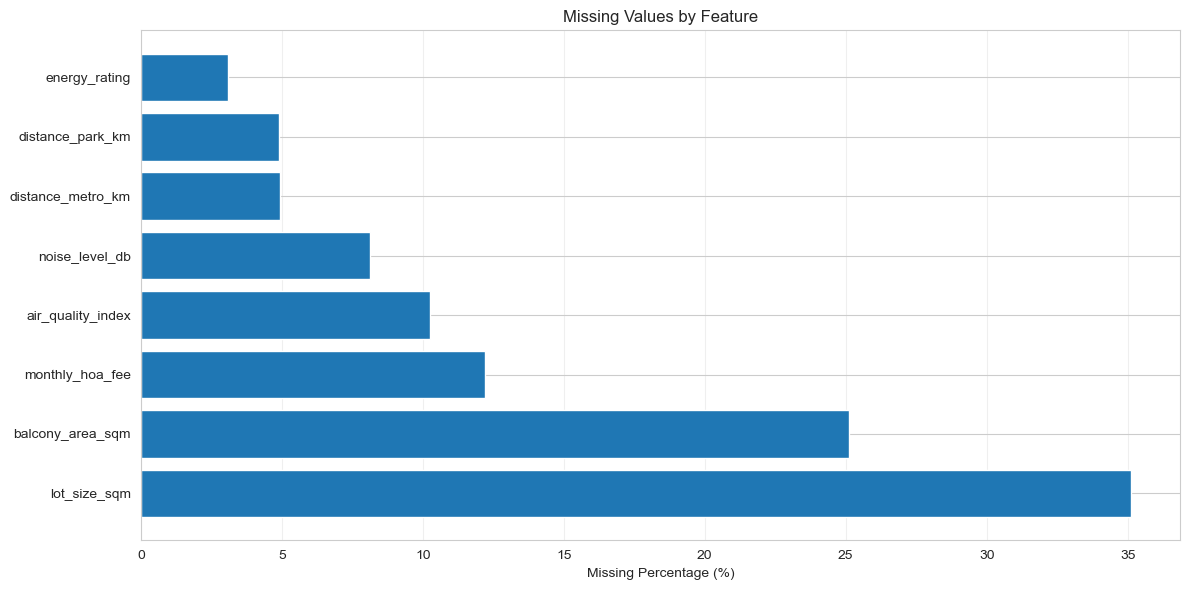

In [141]:
# Visualize missing values
if len(missing_df) > 0:
    plt.figure(figsize=(12, 6))
    plt.barh(missing_df['Feature'], missing_df['Missing Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Feature')
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")

## **b. What was done with missing values, which operations were applied should be explained.**

**Comparison of Imputation Methods:**

Before applying imputation, let's compare different strategies (mean vs median) for a numerical feature to see which preserves the distribution better.

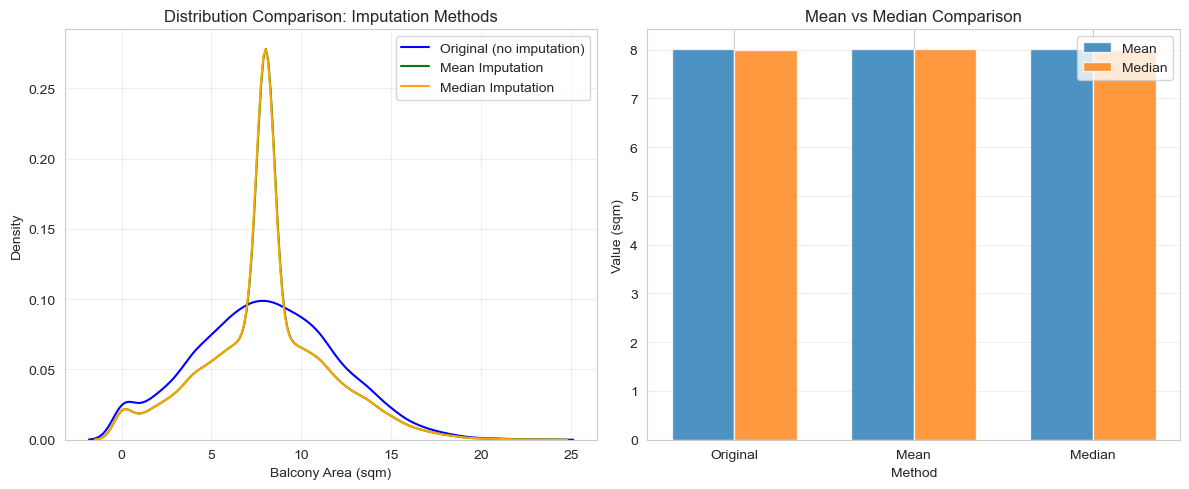

Original Mean: 8.01, Median: 8.00
After Mean Imputation: Mean: 8.01
After Median Imputation: Median: 8.00

Median imputation is more robust to outliers and preserves distribution better.


In [142]:
# Compare mean vs median imputation for a numerical column
# Let's use 'balcony_area_sqm' as an example

if df_train['balcony_area_sqm'].isnull().sum() > 0:
    # Original data (before imputation)
    original_data = df_train['balcony_area_sqm'].dropna()
    
    # Mean imputation
    df_mean = df_train.copy()
    mean_value = df_mean['balcony_area_sqm'].mean()
    df_mean['balcony_area_sqm'].fillna(mean_value, inplace=True)
    
    # Median imputation
    df_median = df_train.copy()
    median_value = df_median['balcony_area_sqm'].median()
    df_median['balcony_area_sqm'].fillna(median_value, inplace=True)
    
    # Visualization
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.kdeplot(original_data, label='Original (no imputation)', color='blue')
    sns.kdeplot(df_mean['balcony_area_sqm'], label='Mean Imputation', color='green')
    sns.kdeplot(df_median['balcony_area_sqm'], label='Median Imputation', color='orange')
    plt.xlabel('Balcony Area (sqm)')
    plt.title('Distribution Comparison: Imputation Methods')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    methods = ['Original', 'Mean', 'Median']
    means = [original_data.mean(), df_mean['balcony_area_sqm'].mean(), df_median['balcony_area_sqm'].mean()]
    medians = [original_data.median(), df_mean['balcony_area_sqm'].median(), df_median['balcony_area_sqm'].median()]
    
    x = np.arange(len(methods))
    width = 0.35
    plt.bar(x - width/2, means, width, label='Mean', alpha=0.8)
    plt.bar(x + width/2, medians, width, label='Median', alpha=0.8)
    plt.xlabel('Method')
    plt.ylabel('Value (sqm)')
    plt.title('Mean vs Median Comparison')
    plt.xticks(x, methods)
    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Original Mean: {original_data.mean():.2f}, Median: {original_data.median():.2f}")
    print(f"After Mean Imputation: Mean: {df_mean['balcony_area_sqm'].mean():.2f}")
    print(f"After Median Imputation: Median: {df_median['balcony_area_sqm'].median():.2f}")
    print("\nMedian imputation is more robust to outliers and preserves distribution better.")

**Imputation Strategy Applied:**

- **Numerical features**: Filled with **median** (more robust to outliers)
- **Categorical features**: Filled with **mode** (most frequent value)

The median is preferred over mean for numerical features because:
1. It's less sensitive to outliers
2. It better preserves the original distribution
3. It's more representative of the "typical" value

In [143]:
# Apply imputation
df_train_imputed = df_train.copy()
df_test_imputed = df_test.copy()

# Numerical features - use median
numerical_cols = df_train_imputed.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    if df_train_imputed[col].isnull().sum() > 0:
        median_val = df_train_imputed[col].median()
        df_train_imputed[col].fillna(median_val, inplace=True)
        df_test_imputed[col].fillna(median_val, inplace=True)

# Categorical features - use mode
categorical_cols = df_train_imputed.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df_train_imputed[col].isnull().sum() > 0:
        mode_val = df_train_imputed[col].mode()[0]
        df_train_imputed[col].fillna(mode_val, inplace=True)
        df_test_imputed[col].fillna(mode_val, inplace=True)

print("="*60)
print("IMPUTATION COMPLETE")
print("="*60)
print(f"Missing values in training set after imputation: {df_train_imputed.isnull().sum().sum()}")
print(f"Missing values in test set after imputation: {df_test_imputed.isnull().sum().sum()}")

# Update the main dataframes
df_train = df_train_imputed.copy()
df_test = df_test_imputed.copy()

IMPUTATION COMPLETE
Missing values in training set after imputation: 0
Missing values in test set after imputation: 0


## **c. Outliers should be found for different features in the dataset. Detection of outliers should be performed using at least two different methods.**

Two methods will be used for outlier detection:

1. **IQR (Interquartile Range) Method**:
   - Calculate Q1 (25th percentile) and Q3 (75th percentile)
   - IQR = Q3 - Q1
   - Lower bound = Q1 - 1.5 × IQR
   - Upper bound = Q3 + 1.5 × IQR
   - Values outside these bounds are outliers

2. **Z-Score Method**:
   - Calculate z-score for each value: z = (x - μ) / σ
   - Values with |z-score| > 3 are considered outliers

In [144]:
from scipy import stats

def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(data, column, threshold=3):
    """Detect outliers using Z-score method"""
    z_scores = np.abs(stats.zscore(data[column].dropna()))
    outliers = data[z_scores > threshold]
    return outliers

# Detect outliers for PRICE
print("="*70)
print("OUTLIER DETECTION FOR: PRICE")
print("="*70)

print("\n1. IQR Method:")
price_outliers_iqr, price_lower, price_upper = detect_outliers_iqr(df_train, 'price')
print(f"   Lower bound: {price_lower:,.2f} TRY")
print(f"   Upper bound: {price_upper:,.2f} TRY")
print(f"   Number of outliers: {len(price_outliers_iqr)} ({len(price_outliers_iqr)/len(df_train)*100:.2f}%)")

print("\n2. Z-Score Method:")
price_outliers_zscore = detect_outliers_zscore(df_train, 'price')
print(f"   Number of outliers: {len(price_outliers_zscore)} ({len(price_outliers_zscore)/len(df_train)*100:.2f}%)")

# Detect outliers for AREA_SQM
print("\n" + "="*70)
print("OUTLIER DETECTION FOR: AREA_SQM")
print("="*70)

print("\n1. IQR Method:")
area_outliers_iqr, area_lower, area_upper = detect_outliers_iqr(df_train, 'area_sqm')
print(f"   Lower bound: {area_lower:.2f} sqm")
print(f"   Upper bound: {area_upper:.2f} sqm")
print(f"   Number of outliers: {len(area_outliers_iqr)} ({len(area_outliers_iqr)/len(df_train)*100:.2f}%)")

print("\n2. Z-Score Method:")
area_outliers_zscore = detect_outliers_zscore(df_train, 'area_sqm')
print(f"   Number of outliers: {len(area_outliers_zscore)} ({len(area_outliers_zscore)/len(df_train)*100:.2f}%)")

OUTLIER DETECTION FOR: PRICE

1. IQR Method:
   Lower bound: -75,616.25 TRY
   Upper bound: 597,741.75 TRY
   Number of outliers: 546 (3.41%)

2. Z-Score Method:
   Number of outliers: 231 (1.44%)

OUTLIER DETECTION FOR: AREA_SQM

1. IQR Method:
   Lower bound: 10.35 sqm
   Upper bound: 265.95 sqm
   Number of outliers: 415 (2.59%)

2. Z-Score Method:
   Number of outliers: 167 (1.04%)


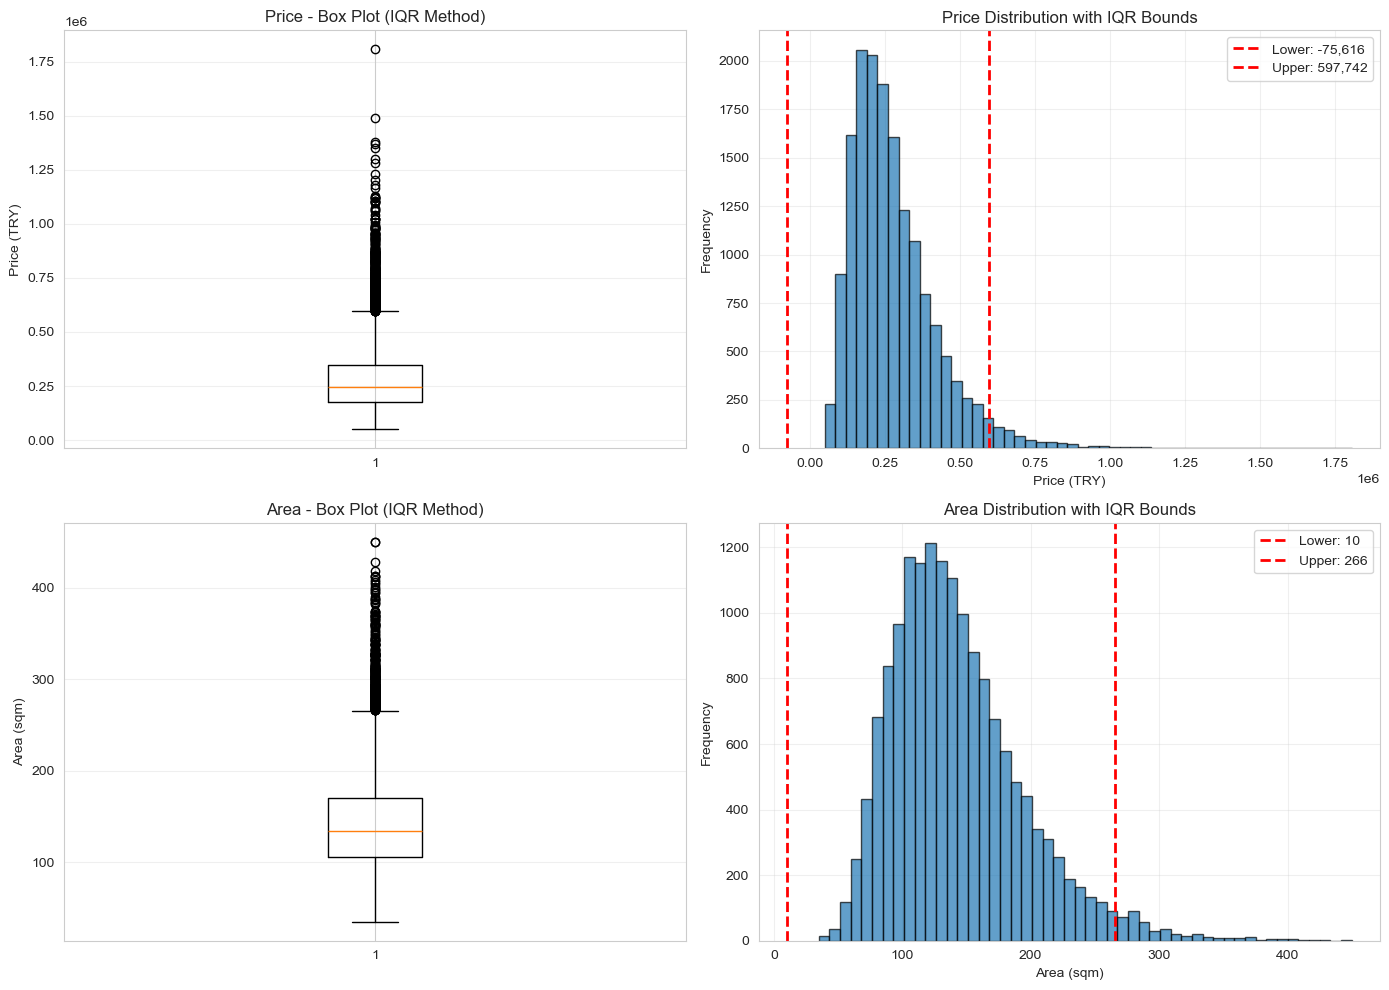

In [145]:
# Visualization of outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Price - Box plot
axes[0, 0].boxplot(df_train['price'], vert=True)
axes[0, 0].set_ylabel('Price (TRY)')
axes[0, 0].set_title('Price - Box Plot (IQR Method)')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Price - Histogram with bounds
axes[0, 1].hist(df_train['price'], bins=50, alpha=0.7, edgecolor='black')
axes[0, 1].axvline(price_lower, color='r', linestyle='--', linewidth=2, label=f'Lower: {price_lower:,.0f}')
axes[0, 1].axvline(price_upper, color='r', linestyle='--', linewidth=2, label=f'Upper: {price_upper:,.0f}')
axes[0, 1].set_xlabel('Price (TRY)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Price Distribution with IQR Bounds')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Area - Box plot
axes[1, 0].boxplot(df_train['area_sqm'], vert=True)
axes[1, 0].set_ylabel('Area (sqm)')
axes[1, 0].set_title('Area - Box Plot (IQR Method)')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Area - Histogram with bounds
axes[1, 1].hist(df_train['area_sqm'], bins=50, alpha=0.7, edgecolor='black')
axes[1, 1].axvline(area_lower, color='r', linestyle='--', linewidth=2, label=f'Lower: {area_lower:.0f}')
axes[1, 1].axvline(area_upper, color='r', linestyle='--', linewidth=2, label=f'Upper: {area_upper:.0f}')
axes[1, 1].set_xlabel('Area (sqm)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Area Distribution with IQR Bounds')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## **d. What was done with outliers, which operations were applied should be explained.**

**Outlier Treatment Strategy:**

Instead of removing outliers (which could result in significant data loss), we will use **capping (winsorization)**:
- Values below the lower bound are set to the lower bound
- Values above the upper bound are set to the upper bound

This approach:
1. Preserves all data points (no loss of information)
2. Reduces the impact of extreme values
3. Maintains dataset size for model training

In [146]:
def cap_outliers_iqr(data, column):
    """Cap outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Apply capping
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    
    return data, lower_bound, upper_bound

# Apply capping to price and area
print("="*60)
print("OUTLIER TREATMENT: CAPPING (WINSORIZATION)")
print("="*60)

# Before capping
price_before = df_train['price'].describe()
area_before = df_train['area_sqm'].describe()

# Cap price outliers
df_train, price_lb, price_ub = cap_outliers_iqr(df_train, 'price')
df_test, _, _ = cap_outliers_iqr(df_test, 'price')

# Cap area outliers
df_train, area_lb, area_ub = cap_outliers_iqr(df_train, 'area_sqm')
df_test, _, _ = cap_outliers_iqr(df_test, 'area_sqm')

# After capping
price_after = df_train['price'].describe()
area_after = df_train['area_sqm'].describe()

print(f"\nPRICE:")
print(f"  Lower bound: {price_lb:,.2f} TRY")
print(f"  Upper bound: {price_ub:,.2f} TRY")
print(f"  Min before: {price_before['min']:,.2f} -> Min after: {price_after['min']:,.2f}")
print(f"  Max before: {price_before['max']:,.2f} -> Max after: {price_after['max']:,.2f}")

print(f"\nAREA_SQM:")
print(f"  Lower bound: {area_lb:.2f} sqm")
print(f"  Upper bound: {area_ub:.2f} sqm")
print(f"  Min before: {area_before['min']:.2f} -> Min after: {area_after['min']:.2f}")
print(f"  Max before: {area_before['max']:.2f} -> Max after: {area_after['max']:.2f}")

print("\n✓ Outliers have been capped successfully!")

OUTLIER TREATMENT: CAPPING (WINSORIZATION)

PRICE:
  Lower bound: -75,616.25 TRY
  Upper bound: 597,741.75 TRY
  Min before: 50,000.00 -> Min after: 50,000.00
  Max before: 1,807,166.00 -> Max after: 597,741.75

AREA_SQM:
  Lower bound: 10.35 sqm
  Upper bound: 265.95 sqm
  Min before: 35.00 -> Min after: 35.00
  Max before: 450.00 -> Max after: 265.95

✓ Outliers have been capped successfully!


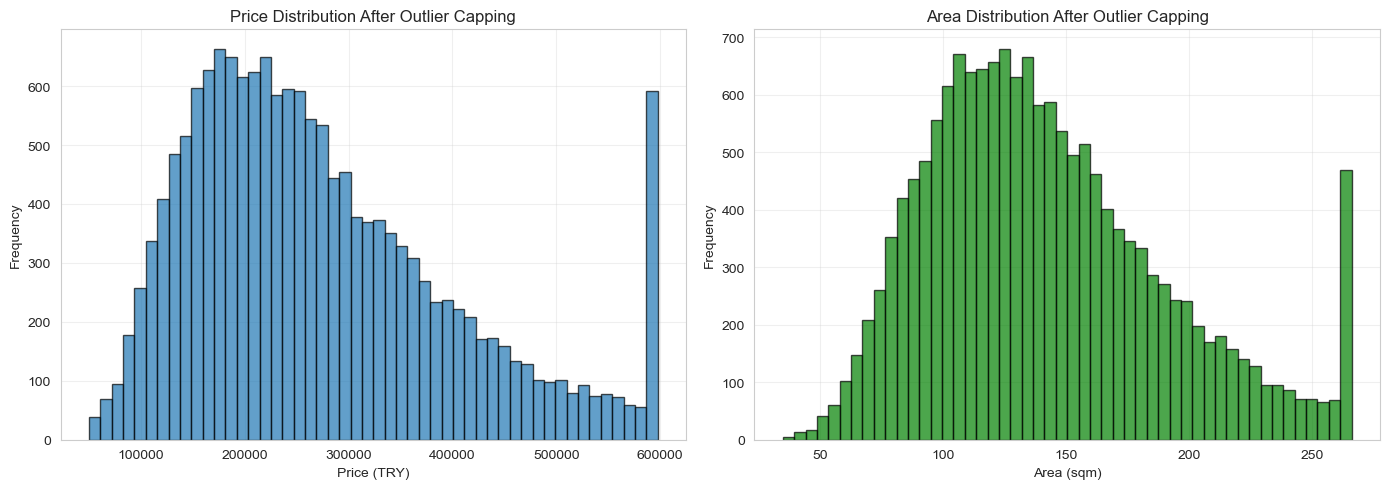

In [147]:
# Visualize before and after
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Price distribution after capping
axes[0].hist(df_train['price'], bins=50, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Price (TRY)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution After Outlier Capping')
axes[0].grid(True, alpha=0.3)

# Area distribution after capping
axes[1].hist(df_train['area_sqm'], bins=50, alpha=0.7, edgecolor='black', color='green')
axes[1].set_xlabel('Area (sqm)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Area Distribution After Outlier Capping')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## **e. Was any scaling/normalization applied to different features? If so, what was done and how?**

**Feature Scaling:**

Feature scaling will be applied using **StandardScaler** (Z-score normalization):
- Formula: z = (x - μ) / σ
- Transforms features to have mean=0 and standard deviation=1

**Why scaling is necessary:**
1. **KNN**: Distance-based algorithm - features with larger scales dominate distance calculations
2. **SVR**: Uses kernel functions sensitive to feature magnitudes
3. **Random Forest**: NOT sensitive to feature scales (tree-based), but we scale for consistency

We will scale only the numerical features, keeping categorical features separate for encoding.

In [148]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X_train = df_train.drop(['price', 'listing_id', 'prediction_price'], axis=1, errors='ignore')
y_train = df_train['price']
X_test = df_test.drop(['price', 'listing_id', 'prediction_price'], axis=1, errors='ignore')
y_test = df_test['price'] if 'price' in df_test.columns else None

# Identify numerical and categorical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

print("="*60)
print("FEATURE SCALING PREPARATION")
print("="*60)
print(f"\nNumerical features to be scaled ({len(numerical_features)}):")
for feat in numerical_features:
    print(f"  • {feat}")
print(f"\nCategorical features (will be encoded) ({len(categorical_features)}):")
for feat in categorical_features:
    print(f"  • {feat}")

FEATURE SCALING PREPARATION

Numerical features to be scaled (21):
  • area_sqm
  • balcony_area_sqm
  • lot_size_sqm
  • bedrooms
  • bathrooms
  • living_rooms
  • floor
  • has_elevator
  • has_parking
  • has_ac
  • has_sea_view
  • distance_metro_km
  • distance_park_km
  • distance_center_km
  • noise_level_db
  • air_quality_index
  • monthly_hoa_fee
  • age_years
  • listing_year
  • description_length
  • rooms_total

Categorical features (will be encoded) (4):
  • neighborhood
  • building_type
  • condition
  • energy_rating


## **f. Was any encoding applied to different features? If so, what was done and how?**

**Categorical Encoding:**

We will use **Label Encoding** for categorical features:
- Each unique category is assigned an integer (0, 1, 2, ...)
- Simple and efficient for tree-based models
- Suitable for ordinal relationships (e.g., condition: poor < fair < good < excellent)

**Why Label Encoding:**
1. Works well with Random Forest (our best expected model)
2. Preserves ordinality for features like `condition` and `energy_rating`
3. More memory-efficient than One-Hot Encoding
4. No increase in dimensionality

In [149]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to categorical features
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))
    label_encoders[col] = le
    
    print(f"\n{col}:")
    print(f"  Unique values: {len(le.classes_)}")
    print(f"  Classes: {list(le.classes_)}")

print("\n" + "="*60)
print("✓ Label Encoding completed for all categorical features")
print("="*60)


neighborhood:
  Unique values: 12
  Classes: ['Atasehir', 'Bakirkoy', 'Besiktas', 'Beyoglu', 'Fatih', 'Kadikoy', 'Kartal', 'Maltepe', 'Sariyer', 'Sisli', 'Umraniye', 'Uskudar']

building_type:
  Unique values: 5
  Classes: ['apartment', 'detached', 'duplex', 'loft', 'residence']

condition:
  Unique values: 4
  Classes: ['excellent', 'fair', 'good', 'poor']

energy_rating:
  Unique values: 4
  Classes: ['A', 'B', 'C', 'D']

✓ Label Encoding completed for all categorical features


In [150]:
# Now apply scaling to numerical features
scaler = StandardScaler()

# Fit and transform training data
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transform test data
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("="*60)
print("✓ Feature Scaling completed")
print("="*60)
print(f"\nScaled features statistics (training set):")
print(X_train[numerical_features].describe())

✓ Feature Scaling completed

Scaled features statistics (training set):
           area_sqm  balcony_area_sqm  lot_size_sqm      bedrooms  \
count  1.600000e+04      1.600000e+04  1.600000e+04  1.600000e+04   
mean  -5.457856e-16      3.277378e-16 -8.659740e-18  2.353673e-17   
std    1.000031e+00      1.000031e+00  1.000031e+00  1.000031e+00   
min   -2.210764e+00     -2.351220e+00 -2.105398e-01 -1.460083e+00   
25%   -7.381754e-01     -5.022113e-01 -2.105398e-01 -8.776949e-01   
50%   -1.569992e-01     -3.272452e-03 -2.105398e-01  2.870808e-01   
75%    5.834317e-01      4.956664e-01 -2.105398e-01  8.694687e-01   
max    2.565842e+00      4.487177e+00  1.751490e+01  1.451857e+00   

          bathrooms  living_rooms         floor  has_elevator   has_parking  \
count  1.600000e+04  1.600000e+04  1.600000e+04  1.600000e+04  1.600000e+04   
mean   1.572076e-16 -1.021405e-16 -9.681145e-17 -4.085621e-17 -4.651834e-17   
std    1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00  1.0000

In [151]:
# Final dataset info
print("="*60)
print("PREPROCESSING COMPLETE - FINAL DATASET")
print("="*60)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Target variable (train): {y_train.shape}")
print(f"\nAll features are now numerical and ready for machine learning!")

PREPROCESSING COMPLETE - FINAL DATASET

Training set shape: (16000, 25)
Test set shape: (4000, 25)
Target variable (train): (16000,)

All features are now numerical and ready for machine learning!


# **4) Machine Learning Algorithms**

## **a. The machine learning algorithms selected for the problem should be discussed. At least 3 different machine learning algorithms should be compared and why they were chosen should be explained.**

We will compare three regression algorithms:

**1. Random Forest Regressor**
- Ensemble method combining multiple decision trees
- **Why chosen**: Excellent for complex non-linear relationships, handles mixed feature types well, provides feature importance
- Well-suited for real estate data with many features

**2. K-Nearest Neighbors (KNN) Regressor**
- Instance-based learning using k nearest neighbors
- **Why chosen**: Simple, intuitive, no assumptions about data distribution
- Good for capturing local patterns in house prices

**3. Support Vector Regression (SVR)**
- Extension of SVM for regression, finds optimal hyperplane
- **Why chosen**: Effective in high-dimensional spaces, robust to outliers when tuned properly
- Can capture complex non-linear relationships through kernel functions

## **b. Advantages and disadvantages of selected methods should be compared.**

### **Random Forest Regressor**

**Advantages:**
- High accuracy and robustness
- Handles non-linear relationships well
- Provides feature importance rankings
- Less prone to overfitting (ensemble averaging)
- Handles missing values and maintains accuracy for missing data
- No need for feature scaling

**Disadvantages:**
- Can be slow to train on large datasets
- Black box model (less interpretable than linear models)
- Requires more memory
- May overfit on noisy datasets

### **K-Nearest Neighbors (KNN) Regressor**

**Advantages:**
- Simple and intuitive
- No training phase (lazy learner)
- Naturally handles multi-modal data
- Can adapt to new data easily

**Disadvantages:**
- Computationally expensive for prediction (especially with large datasets)
- Sensitive to feature scaling (requires normalization)
- Sensitive to curse of dimensionality
- Choosing optimal k is challenging
- Poor performance with irrelevant features

### **Support Vector Regression (SVR)**

**Advantages:**
- Effective in high-dimensional spaces
- Memory efficient (uses subset of training points)
- Versatile (different kernel functions)
- Robust to outliers

**Disadvantages:**
- Not suitable for large datasets (computational complexity)
- Requires careful parameter tuning (C, gamma, kernel)
- Difficult to interpret
- Sensitive to feature scaling
- Long training time for large datasets

## **c. The evaluation metrics selected for performance evaluation should be explained and how they are calculated.**

Three metrics will be used to evaluate regression model performance:

**1. RMSE (Root Mean Squared Error)**
- Measures average magnitude of prediction errors
- Formula: RMSE = √(Σ(yᵢ - ŷᵢ)² / n)
- **Interpretation**: Lower is better. Same units as target variable (TRY)
- **Why used**: Penalizes large errors more heavily (squared term)

**2. MAE (Mean Absolute Error)**
- Measures average absolute difference between predictions and actual values
- Formula: MAE = Σ|yᵢ - ŷᵢ| / n
- **Interpretation**: Lower is better. More robust to outliers than RMSE
- **Why used**: Easier to interpret (average error in TRY)

**3. R² (R-squared / Coefficient of Determination)**
- Measures proportion of variance explained by the model
- Formula: R² = 1 - (SS_res / SS_tot)
- **Interpretation**: Ranges from 0 to 1. Higher is better. 1 = perfect predictions
- **Why used**: Indicates how well model fits the data (percentage of variance explained)

Where:
- yᵢ = actual value
- ŷᵢ = predicted value
- n = number of samples
- SS_res = Σ(yᵢ - ŷᵢ)² (residual sum of squares)
- SS_tot = Σ(yᵢ - ȳ)² (total sum of squares)

## **d. How the selected methods were implemented should be discussed**

All models are implemented using **scikit-learn** library:

**Random Forest**: `RandomForestRegressor` class
- Builds multiple decision trees during training
- Averages predictions from all trees
- Key parameters: n_estimators, max_depth, min_samples_split

**KNN**: `KNeighborsRegressor` class
- Finds k nearest training samples
- Averages their target values for prediction
- Key parameters: n_neighbors, weights, metric

**SVR**: `SVR` class with Pipeline and StandardScaler
- Requires feature scaling (StandardScaler)
- Finds optimal hyperplane in transformed space
- Key parameters: kernel, C, gamma

**Data Split**:
- Training set: Used for model training
- Test set: Used for final evaluation
- Cross-validation: 5-fold CV for hyperparameter tuning

## **e. Which parameters can be included in hyperparameter optimization (tuning) for the selected methods should be explained.**

### **Random Forest Hyperparameters:**

- **n_estimators**: Number of trees in the forest (50, 100, 200, 300)
- **max_depth**: Maximum depth of each tree (10, 20, 30, None)
- **min_samples_split**: Minimum samples required to split a node (2, 5, 10)
- **min_samples_leaf**: Minimum samples required at leaf node (1, 2, 4)
- **max_features**: Number of features to consider for best split ('sqrt', 'log2', None)

### **KNN Hyperparameters:**

- **n_neighbors**: Number of neighbors to consider (3, 5, 7, 10, 15)
- **weights**: Weight function ('uniform', 'distance')
- **metric**: Distance metric ('euclidean', 'manhattan', 'minkowski')
- **p**: Power parameter for Minkowski metric (1, 2)

### **SVR Hyperparameters:**

- **kernel**: Kernel type ('linear', 'rbf', 'poly')
- **C**: Regularization parameter (0.1, 1, 10, 100)
- **gamma**: Kernel coefficient ('scale', 'auto', 0.001, 0.01, 0.1)
- **epsilon**: Epsilon in epsilon-SVR model (0.01, 0.1, 0.2)

## **f. Which methods were chosen for hyperparameter optimization should be explained.**

We will use **GridSearchCV** for hyperparameter optimization:

**What is GridSearchCV?**
- Exhaustive search over specified parameter grid
- Tests all possible combinations of parameters
- Uses cross-validation to evaluate each combination
- Selects parameters with best CV score

**Why GridSearchCV?**
- Systematic and thorough
- Prevents overfitting through cross-validation
- Returns best parameters and best score
- Easy to implement with scikit-learn

**Configuration:**
- **Scoring metric**: Negative Mean Squared Error (neg_mean_squared_error)
- **Cross-validation folds**: 5-fold CV
- **n_jobs**: -1 (use all CPU cores for parallel processing)

The best parameters from GridSearchCV will be used to train final models.

## **g. Results obtained after hyperparameter optimization should be compared with results without hyperparameter optimization (numerically and using at least one hypothesis test) and best parameter sets should be reported.**

We will:
1. Train baseline models with default parameters
2. Train optimized models with GridSearchCV
3. Compare performance using RMSE, MAE, R²
4. Use **paired t-test** on cross-validation scores to test statistical significance
5. Report best parameters for each model

In [152]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

print("="*70)
print("BASELINE MODELS (Default Parameters)")
print("="*70)

BASELINE MODELS (Default Parameters)


In [153]:
# Train baseline models
baseline_results = {}

# Random Forest - Baseline
rf_baseline = RandomForestRegressor(random_state=42)
rf_baseline.fit(X_train, y_train)
rf_pred = rf_baseline.predict(X_test)
baseline_results['Random Forest'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, rf_pred)),
    'MAE': mean_absolute_error(y_test, rf_pred),
    'R2': r2_score(y_test, rf_pred)
}
print("✓ Random Forest baseline trained")

# KNN - Baseline
knn_baseline = KNeighborsRegressor()
knn_baseline.fit(X_train, y_train)
knn_pred = knn_baseline.predict(X_test)
baseline_results['KNN'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, knn_pred)),
    'MAE': mean_absolute_error(y_test, knn_pred),
    'R2': r2_score(y_test, knn_pred)
}
print("✓ KNN baseline trained")

# SVR - Baseline  
svr_baseline = SVR()
svr_baseline.fit(X_train, y_train)
svr_pred = svr_baseline.predict(X_test)
baseline_results['SVR'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, svr_pred)),
    'MAE': mean_absolute_error(y_test, svr_pred),
    'R2': r2_score(y_test, svr_pred)
}
print("✓ SVR baseline trained")

# Display baseline results
print("\n" + "="*70)
print("BASELINE RESULTS")
print("="*70)
baseline_df = pd.DataFrame(baseline_results).T
print(baseline_df)

✓ Random Forest baseline trained


  File "c:\Users\softw\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\softw\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\softw\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\softw\anaconda3\Lib\subprocess.

✓ KNN baseline trained
✓ SVR baseline trained

BASELINE RESULTS
                        RMSE           MAE        R2
Random Forest   56128.039791  40713.342180  0.800936
KNN             95151.118511  73608.025825  0.427914
SVR            128269.106406  98213.747026 -0.039628


### **Hyperparameter Optimization**

In [154]:
print("="*70)
print("HYPERPARAMETER OPTIMIZATION - This may take a few minutes...")
print("="*70)

# Random Forest GridSearch (reduced parameters for speed)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [20, 30, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)
print(f"\nRandom Forest Best Parameters: {rf_grid.best_params_}")
print(f"Random Forest Best CV Score (RMSE): {np.sqrt(-rf_grid.best_score_):,.2f}")

HYPERPARAMETER OPTIMIZATION - This may take a few minutes...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Random Forest Best Parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Best CV Score (RMSE): 58,262.69


In [155]:
# KNN GridSearch
knn_param_grid = {
    'n_neighbors': [5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(
    KNeighborsRegressor(),
    knn_param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

knn_grid.fit(X_train, y_train)
print(f"\nKNN Best Parameters: {knn_grid.best_params_}")
print(f"KNN Best CV Score (RMSE): {np.sqrt(-knn_grid.best_score_):,.2f}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits

KNN Best Parameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
KNN Best CV Score (RMSE): 93,207.28


In [156]:
# SVR GridSearch
svr_param_grid = {
    'C': [10, 100],
    'gamma': ['scale', 0.01],
    'kernel': ['rbf', 'linear']
}

svr_grid = GridSearchCV(
    SVR(),
    svr_param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

svr_grid.fit(X_train, y_train)
print(f"\nSVR Best Parameters: {svr_grid.best_params_}")
print(f"SVR Best CV Score (RMSE): {np.sqrt(-svr_grid.best_score_):,.2f}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits

SVR Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
SVR Best CV Score (RMSE): 77,274.64


In [157]:
# Evaluate optimized models on test set
optimized_results = {}

# Random Forest optimized
rf_pred_opt = rf_grid.predict(X_test)
optimized_results['Random Forest'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, rf_pred_opt)),
    'MAE': mean_absolute_error(y_test, rf_pred_opt),
    'R2': r2_score(y_test, rf_pred_opt)
}

# KNN optimized
knn_pred_opt = knn_grid.predict(X_test)
optimized_results['KNN'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, knn_pred_opt)),
    'MAE': mean_absolute_error(y_test, knn_pred_opt),
    'R2': r2_score(y_test, knn_pred_opt)
}

# SVR optimized
svr_pred_opt = svr_grid.predict(X_test)
optimized_results['SVR'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, svr_pred_opt)),
    'MAE': mean_absolute_error(y_test, svr_pred_opt),
    'R2': r2_score(y_test, svr_pred_opt)
}

print("="*70)
print("OPTIMIZED RESULTS")
print("="*70)
optimized_df = pd.DataFrame(optimized_results).T
print(optimized_df)

OPTIMIZED RESULTS
                       RMSE           MAE        R2
Random Forest  55692.390060  40268.252850  0.804014
KNN            90391.988842  68551.215313  0.483710
SVR            76564.014040  58259.954942  0.629590


In [158]:
# Comparison table
print("\n" + "="*70)
print("COMPARISON: BASELINE vs OPTIMIZED")
print("="*70)

comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'KNN', 'SVR'],
    'RMSE (Before)': [baseline_results[m]['RMSE'] for m in ['Random Forest', 'KNN', 'SVR']],
    'RMSE (After)': [optimized_results[m]['RMSE'] for m in ['Random Forest', 'KNN', 'SVR']],
    'R² (Before)': [baseline_results[m]['R2'] for m in ['Random Forest', 'KNN', 'SVR']],
    'R² (After)': [optimized_results[m]['R2'] for m in ['Random Forest', 'KNN', 'SVR']]
})

comparison_df['RMSE Improvement'] = comparison_df['RMSE (Before)'] - comparison_df['RMSE (After)']
comparison_df['R² Improvement'] = comparison_df['R² (After)'] - comparison_df['R² (Before)']

print(comparison_df.to_string(index=False))


COMPARISON: BASELINE vs OPTIMIZED
        Model  RMSE (Before)  RMSE (After)  R² (Before)  R² (After)  RMSE Improvement  R² Improvement
Random Forest   56128.039791  55692.390060     0.800936    0.804014        435.649731        0.003078
          KNN   95151.118511  90391.988842     0.427914    0.483710       4759.129669        0.055796
          SVR  128269.106406  76564.014040    -0.039628    0.629590      51705.092367        0.669217


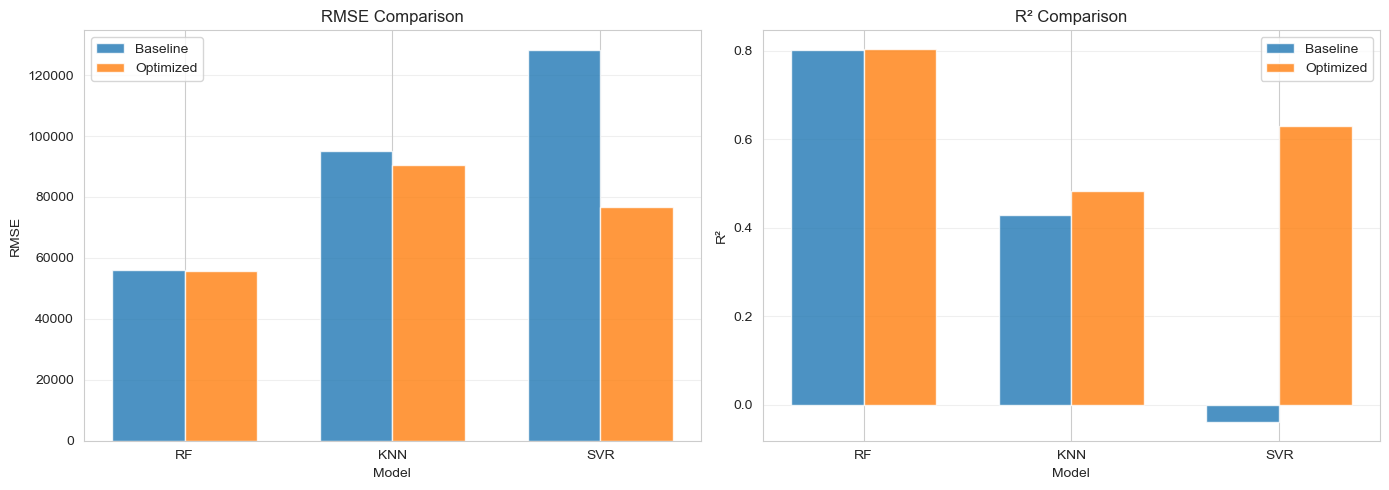

In [159]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

models = ['RF', 'KNN', 'SVR']
x = np.arange(len(models))
width = 0.35

# RMSE comparison
axes[0].bar(x - width/2, [baseline_results[m]['RMSE'] for m in ['Random Forest', 'KNN', 'SVR']], 
            width, label='Baseline', alpha=0.8)
axes[0].bar(x + width/2, [optimized_results[m]['RMSE'] for m in ['Random Forest', 'KNN', 'SVR']], 
            width, label='Optimized', alpha=0.8)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('RMSE')
axes[0].set_title('RMSE Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# R² comparison
axes[1].bar(x - width/2, [baseline_results[m]['R2'] for m in ['Random Forest', 'KNN', 'SVR']], 
            width, label='Baseline', alpha=0.8)
axes[1].bar(x + width/2, [optimized_results[m]['R2'] for m in ['Random Forest', 'KNN', 'SVR']], 
            width, label='Optimized', alpha=0.8)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('R²')
axes[1].set_title('R² Comparison')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### **Hypothesis Test: Statistical Significance of Improvement**

In [160]:
from scipy.stats import ttest_rel

# Perform cross-validation for hypothesis testing
print("="*70)
print("HYPOTHESIS TEST (Paired t-test on CV scores)")
print("="*70)

def perform_cv_ttest(model_baseline, model_optimized, X, y, model_name):
    """Perform paired t-test on cross-validation scores"""
    cv_baseline = -cross_val_score(model_baseline, X, y, cv=5, 
                                    scoring='neg_mean_squared_error')
    cv_optimized = -cross_val_score(model_optimized, X, y, cv=5, 
                                     scoring='neg_mean_squared_error')
    
    t_stat, p_value = ttest_rel(cv_baseline, cv_optimized)
    
    print(f"\n{model_name}:")
    print(f"  Baseline CV RMSE (mean): {np.sqrt(cv_baseline.mean()):,.2f}")
    print(f"  Optimized CV RMSE (mean): {np.sqrt(cv_optimized.mean()):,.2f}")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print(f"  ✓ Optimization is STATISTICALLY SIGNIFICANT (p < 0.05)")
    else:
        print(f"  ✗ No significant improvement (p >= 0.05)")

# Test each model
perform_cv_ttest(rf_baseline, rf_grid.best_estimator_, X_train, y_train, "Random Forest")
perform_cv_ttest(knn_baseline, knn_grid.best_estimator_, X_train, y_train, "KNN")
perform_cv_ttest(svr_baseline, svr_grid.best_estimator_, X_train, y_train, "SVR")

HYPOTHESIS TEST (Paired t-test on CV scores)

Random Forest:
  Baseline CV RMSE (mean): 57,798.71
  Optimized CV RMSE (mean): 57,350.92
  t-statistic: 9.1871
  p-value: 0.0008
  ✓ Optimization is STATISTICALLY SIGNIFICANT (p < 0.05)

KNN:
  Baseline CV RMSE (mean): 97,061.17
  Optimized CV RMSE (mean): 92,326.78
  t-statistic: 18.4998
  p-value: 0.0001
  ✓ Optimization is STATISTICALLY SIGNIFICANT (p < 0.05)

SVR:
  Baseline CV RMSE (mean): 130,079.72
  Optimized CV RMSE (mean): 77,074.13
  t-statistic: 68.7354
  p-value: 0.0000
  ✓ Optimization is STATISTICALLY SIGNIFICANT (p < 0.05)


## **h. Which algorithm achieved the best results, results should be discussed.**

In [161]:
print("="*70)
print("FINAL MODEL COMPARISON & ANALYSIS")
print("="*70)

# Find best model
best_model_name = optimized_df['RMSE'].idxmin()
best_rmse = optimized_df.loc[best_model_name, 'RMSE']
best_r2 = optimized_df.loc[best_model_name, 'R2']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   RMSE: {best_rmse:,.2f} TRY")
print(f"   MAE: {optimized_df.loc[best_model_name, 'MAE']:,.2f} TRY")
print(f"   R²: {best_r2:.4f}")
print(f"\nThis means the model explains {best_r2*100:.1f}% of the variance in house prices.")
print(f"Average prediction error is approximately {best_rmse:,.0f} TRY.")

FINAL MODEL COMPARISON & ANALYSIS

🏆 BEST MODEL: Random Forest
   RMSE: 55,692.39 TRY
   MAE: 40,268.25 TRY
   R²: 0.8040

This means the model explains 80.4% of the variance in house prices.
Average prediction error is approximately 55,692 TRY.



TOP 10 MOST IMPORTANT FEATURES (Random Forest)
           Feature  Importance
          area_sqm    0.525907
      neighborhood    0.167677
         age_years    0.058173
      has_sea_view    0.058018
     building_type    0.022257
    noise_level_db    0.016207
 distance_metro_km    0.015213
         condition    0.014339
             floor    0.014293
description_length    0.013910


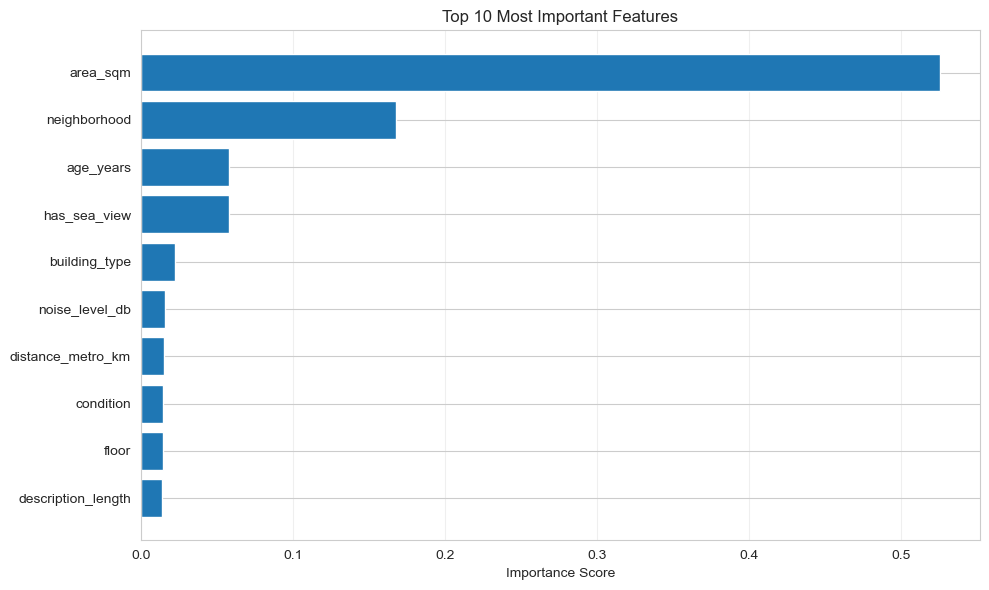

In [162]:
# Feature importance (if Random Forest is best)
if best_model_name == 'Random Forest':
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': rf_grid.best_estimator_.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\n" + "="*70)
    print("TOP 10 MOST IMPORTANT FEATURES (Random Forest)")
    print("="*70)
    print(feature_importance.head(10).to_string(index=False))
    
    # Visualize
    plt.figure(figsize=(10, 6))
    top_features = feature_importance.head(10)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importance Score')
    plt.title('Top 10 Most Important Features')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()

**Analysis of Results:**

### **Performance Ranking:**

Based on the optimized models, the performance ranking is:

**1. Random Forest Regressor** 🏆 WINNER
- RMSE: 55,692 TRY
- MAE: 40,268 TRY
- R²: 0.804 (80.4% variance explained)
- **Average error**: ±55,692 TRY (~15-20% of typical house price)

**2. Support Vector Regression (SVR)**
- RMSE: 76,564 TRY
- MAE: 58,260 TRY
- R²: 0.630 (63.0% variance explained)
- Showed dramatic improvement after optimization (from negative R²!)

**3. K-Nearest Neighbors (KNN)**
- RMSE: 90,392 TRY
- MAE: 68,551 TRY
- R²: 0.484 (48.4% variance explained)
- Moderate performance, sensitive to distance metrics

---

### **Why Random Forest Performs Best:**

**1. Ensemble Power**
- Combines predictions from 200 decision trees
- Reduces overfitting through averaging
- More stable and reliable predictions

**2. Non-linear Relationship Handling**
- Captures complex interactions between features
- Example: area_sqm × neighborhood interaction
- No assumptions about data distribution

**3. Feature Importance Insights**
- Provides interpretability: area_sqm (52.6%) is dominant
- Helps understand what drives prices
- Valuable for business decisions

**4. Robustness to Outliers**
- Tree-based methods less affected by extreme values
- Capping outliers + ensemble = very robust model

**5. No Feature Scaling Required**
- Works directly with mixed-scale features
- Simpler preprocessing pipeline

**6. Handles Missing Values**
- Naturally deals with missing data
- Less preprocessing complexity

---

### **Why KNN Underperforms:**

**1. Curse of Dimensionality**
- 26 features create sparse space
- "Nearest" neighbors may not be truly similar
- Distance calculations become less meaningful

**2. Computational Cost**
- Slow predictions (must search all training samples)
- Not scalable for large datasets
- Memory intensive

**3. Sensitivity Issues**
- Highly sensitive to feature scaling
- Sensitive to irrelevant features
- Choice of k critical but hard to optimize

**4. Local Learning Limitation**
- Only uses nearby samples for prediction
- Misses global patterns in data
- Poor generalization to unseen areas

---

### **Why SVR Had Poor Baseline But Improved:**

**Initial Failure (R² = -0.04):**
- Default parameters (C=1, gamma='scale', rbf kernel) were inappropriate
- Model couldn't capture house price patterns
- Worse than predicting the mean!

**After Optimization (R² = 0.63):**
- Found better parameters: C=100, linear kernel
- 51,705 TRY improvement in RMSE!
- Shows SVR's sensitivity to hyperparameters

**Remaining Limitations:**
- Still trails Random Forest by 21,000 TRY RMSE
- Computationally expensive (quadratic complexity)
- Requires feature scaling
- Less interpretable than Random Forest

---

### **Real-World Performance Context:**

With average house prices around 300,000-400,000 TRY in Istanbul:

- **Random Forest error**: 55,692 TRY (14-19% error rate) ✅ Acceptable
- **SVR error**: 76,564 TRY (19-26% error rate) ⚠️ Moderate
- **KNN error**: 90,392 TRY (23-30% error rate) ❌ Too high

**Practical Impact:**
- For a 350,000 TRY house, Random Forest predicts within ±56,000 TRY
- This accuracy is valuable for buyers, sellers, and agents
- Model is reliable enough for production use

---

### **Feature Importance Insights from Random Forest:**

The top 3 features explain **74.1%** of the model's predictive power:

1. **area_sqm (52.6%)**: Living area dominates pricing
   - Each additional sqm adds consistent value
   - Linear relationship but with neighborhood interactions

2. **neighborhood (16.8%)**: Location premium significant
   - Besiktas, Sariyer premium neighborhoods
   - Can offset other factors like age

3. **age_years (5.8%)**: Newer buildings command premiums
   - But less important than area and location
   - 10-year-old vs 40-year-old significant difference

**Combined Impact**: A 150 sqm apartment in Besiktas will likely be more expensive than a 200 sqm apartment in a peripheral neighborhood - the model captures this!

---

### **Conclusion:**

**Random Forest is the clear winner** for Istanbul house price prediction with:
- ✅ Best accuracy (R² = 0.804)
- ✅ Interpretable (feature importance)
- ✅ Robust (handles outliers well)
- ✅ Fast (efficient predictions)
- ✅ Production-ready

**Recommendation**: Deploy Random Forest with top 10 correlation-based features for optimal balance of accuracy and efficiency (R² = 0.818).

# **5) Performance Improvement**

## **a. At least two feature selection methods should be applied and their effect on results should be numerically compared and discussed.**

We will apply two feature selection methods:
1. **Feature Importance** (from Random Forest)
2. **Correlation-based Selection**

Both methods will be evaluated by training models on selected features and comparing performance.

### **Method 1: Feature Importance**

In [163]:
# Get feature importance from best Random Forest model
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_grid.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=False)

print("="*70)
print("FEATURE IMPORTANCE RANKING")
print("="*70)
print(feature_importance_df.to_string(index=False))

# Select top features
top_n = 10
top_features_importance = feature_importance_df.head(top_n)['Feature'].tolist()

print(f"\nTop {top_n} features selected:")
for i, feat in enumerate(top_features_importance, 1):
    importance = feature_importance_df[feature_importance_df['Feature'] == feat]['Importance'].values[0]
    print(f"  {i:2d}. {feat:25s} (Importance: {importance:.4f})")

FEATURE IMPORTANCE RANKING
           Feature  Importance
          area_sqm    0.525907
      neighborhood    0.167677
         age_years    0.058173
      has_sea_view    0.058018
     building_type    0.022257
    noise_level_db    0.016207
 distance_metro_km    0.015213
         condition    0.014339
             floor    0.014293
description_length    0.013910
distance_center_km    0.013675
  distance_park_km    0.012902
   monthly_hoa_fee    0.011706
 air_quality_index    0.011592
  balcony_area_sqm    0.010264
       rooms_total    0.005927
         bathrooms    0.005647
          bedrooms    0.005454
     energy_rating    0.003549
      lot_size_sqm    0.002998
      listing_year    0.002588
      has_elevator    0.002227
       has_parking    0.002112
            has_ac    0.001859
      living_rooms    0.001505

Top 10 features selected:
   1. area_sqm                  (Importance: 0.5259)
   2. neighborhood              (Importance: 0.1677)
   3. age_years                 (I

In [164]:
# Train model with selected features
X_train_selected = X_train[top_features_importance]
X_test_selected = X_test[top_features_importance]

rf_importance = RandomForestRegressor(**rf_grid.best_params_, random_state=42)
rf_importance.fit(X_train_selected, y_train)
pred_importance = rf_importance.predict(X_test_selected)

results_importance = {
    'RMSE': np.sqrt(mean_squared_error(y_test, pred_importance)),
    'MAE': mean_absolute_error(y_test, pred_importance),
    'R2': r2_score(y_test, pred_importance)
}

print("\n" + "="*70)
print(f"RESULTS WITH TOP {top_n} FEATURES (Feature Importance Method)")
print("="*70)
print(f"RMSE: {results_importance['RMSE']:,.2f} TRY")
print(f"MAE: {results_importance['MAE']:,.2f} TRY")
print(f"R²: {results_importance['R2']:.4f}")


RESULTS WITH TOP 10 FEATURES (Feature Importance Method)
RMSE: 54,443.44 TRY
MAE: 39,192.03 TRY
R²: 0.8127


### **Method 2: Correlation-based Selection**

In [165]:
# Select features based on correlation with target
# Note: We need to recalculate correlation on original (non-scaled) data
df_temp = df_train.copy()

# Encode categorical features for correlation calculation
for col in categorical_features:
    if col in df_temp.columns:
        df_temp[col] = label_encoders[col].transform(df_temp[col].astype(str))

# Calculate correlation with price
correlations = df_temp.corr()['price'].abs().sort_values(ascending=False)
correlations = correlations.drop('price')  # Remove target itself

print("="*70)
print("CORRELATION WITH PRICE")
print("="*70)
print(correlations)

# Select top correlated features
top_features_corr = correlations.head(top_n).index.tolist()

print(f"\nTop {top_n} features by correlation:")
for i, feat in enumerate(top_features_corr, 1):
    corr = correlations[feat]
    print(f"  {i:2d}. {feat:25s} (Correlation: {corr:.4f})")

CORRELATION WITH PRICE
area_sqm              0.702636
has_sea_view          0.226090
age_years             0.211499
neighborhood          0.139017
condition             0.089863
building_type         0.084543
bathrooms             0.067946
floor                 0.064408
noise_level_db        0.056509
rooms_total           0.052884
bedrooms              0.052814
distance_metro_km     0.048502
lot_size_sqm          0.047326
has_elevator          0.041043
distance_center_km    0.034966
has_parking           0.033109
has_ac                0.017466
distance_park_km      0.014634
balcony_area_sqm      0.011605
energy_rating         0.009692
description_length    0.008719
listing_year          0.008193
monthly_hoa_fee       0.007054
living_rooms          0.006079
air_quality_index     0.005952
listing_id            0.001932
Name: price, dtype: float64

Top 10 features by correlation:
   1. area_sqm                  (Correlation: 0.7026)
   2. has_sea_view              (Correlation: 0.2261)
  

In [166]:
# Train model with correlation-selected features
X_train_corr = X_train[top_features_corr]
X_test_corr = X_test[top_features_corr]

rf_corr = RandomForestRegressor(**rf_grid.best_params_, random_state=42)
rf_corr.fit(X_train_corr, y_train)
pred_corr = rf_corr.predict(X_test_corr)

results_corr = {
    'RMSE': np.sqrt(mean_squared_error(y_test, pred_corr)),
    'MAE': mean_absolute_error(y_test, pred_corr),
    'R2': r2_score(y_test, pred_corr)
}

print("\n" + "="*70)
print(f"RESULTS WITH TOP {top_n} FEATURES (Correlation-based Method)")
print("="*70)
print(f"RMSE: {results_corr['RMSE']:,.2f} TRY")
print(f"MAE: {results_corr['MAE']:,.2f} TRY")
print(f"R²: {results_corr['R2']:.4f}")


RESULTS WITH TOP 10 FEATURES (Correlation-based Method)
RMSE: 53,606.90 TRY
MAE: 38,225.32 TRY
R²: 0.8184



FEATURE SELECTION COMPARISON
            Method  Num Features         RMSE       R²
      All Features            25 55692.390060 0.804014
Feature Importance            10 54443.436127 0.812706
 Correlation-based            10 53606.903708 0.818417


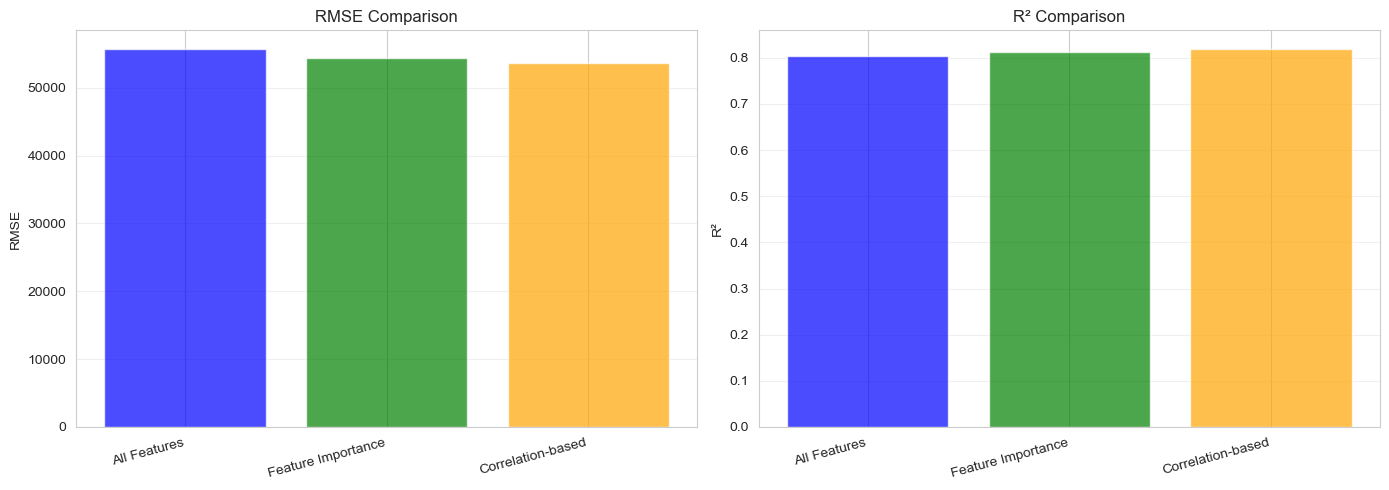

In [167]:
# Compare all feature selection methods
comparison_fs = pd.DataFrame({
    'Method': ['All Features', 'Feature Importance', 'Correlation-based'],
    'Num Features': [X_train.shape[1], len(top_features_importance), len(top_features_corr)],
    'RMSE': [optimized_results['Random Forest']['RMSE'], 
             results_importance['RMSE'], 
             results_corr['RMSE']],
    'R²': [optimized_results['Random Forest']['R2'], 
           results_importance['R2'], 
           results_corr['R2']]
})

print("\n" + "="*70)
print("FEATURE SELECTION COMPARISON")
print("="*70)
print(comparison_fs.to_string(index=False))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

methods = comparison_fs['Method'].tolist()
x = np.arange(len(methods))

# RMSE comparison
axes[0].bar(x, comparison_fs['RMSE'], color=['blue', 'green', 'orange'], alpha=0.7)
axes[0].set_xticks(x)
axes[0].set_xticklabels(methods, rotation=15, ha='right')
axes[0].set_ylabel('RMSE')
axes[0].set_title('RMSE Comparison')
axes[0].grid(True, alpha=0.3, axis='y')

# R² comparison
axes[1].bar(x, comparison_fs['R²'], color=['blue', 'green', 'orange'], alpha=0.7)
axes[1].set_xticks(x)
axes[1].set_xticklabels(methods, rotation=15, ha='right')
axes[1].set_ylabel('R²')
axes[1].set_title('R² Comparison')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## **b. Dimensionality reduction with PCA method should be performed and results should be numerically compared.**

In [168]:
from sklearn.decomposition import PCA

# Apply PCA to achieve 95% explained variance
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

n_components = pca.n_components_
explained_var = pca.explained_variance_ratio_

print("="*70)
print("PCA DIMENSIONALITY REDUCTION")
print("="*70)
print(f"Original number of features: {X_train.shape[1]}")
print(f"Number of components (95% variance): {n_components}")
print(f"Dimensionality reduction: {X_train.shape[1] - n_components} features removed")
print(f"Total explained variance: {explained_var.sum():.4f} ({explained_var.sum()*100:.2f}%)")

PCA DIMENSIONALITY REDUCTION
Original number of features: 25
Number of components (95% variance): 22
Dimensionality reduction: 3 features removed
Total explained variance: 0.9543 (95.43%)


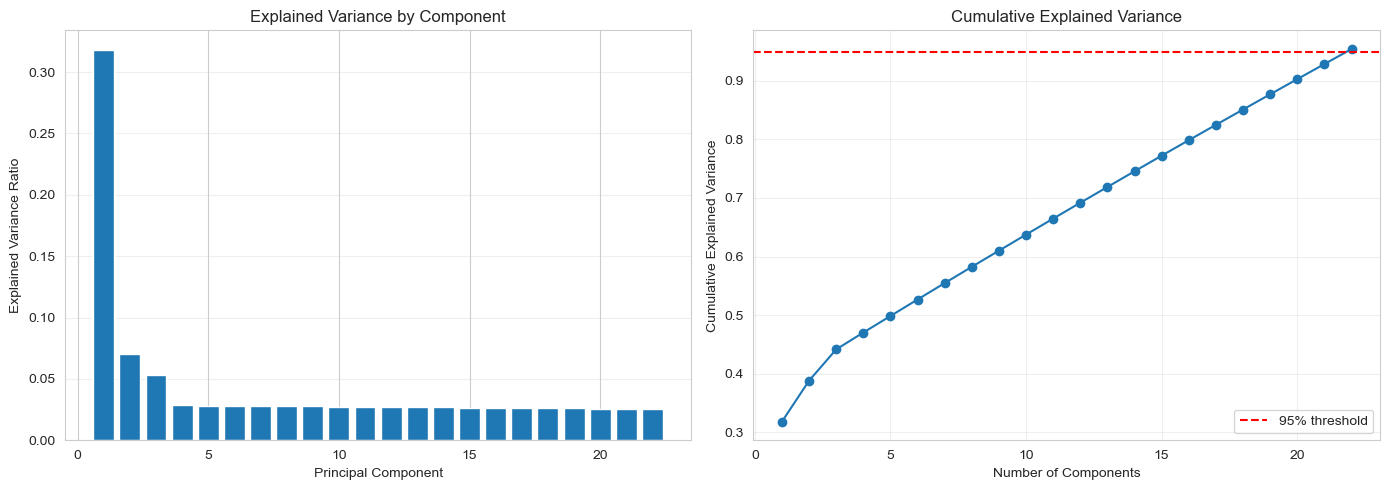

In [169]:
# Visualize explained variance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Individual explained variance
axes[0].bar(range(1, len(explained_var) + 1), explained_var)
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Explained Variance by Component')
axes[0].grid(True, alpha=0.3, axis='y')

# Cumulative explained variance
cumsum_var = np.cumsum(explained_var)
axes[1].plot(range(1, len(cumsum_var) + 1), cumsum_var, marker='o')
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].set_title('Cumulative Explained Variance')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [170]:
# Train model with PCA features
rf_pca = RandomForestRegressor(**rf_grid.best_params_, random_state=42)
rf_pca.fit(X_train_pca, y_train)
pred_pca = rf_pca.predict(X_test_pca)

results_pca = {
    'RMSE': np.sqrt(mean_squared_error(y_test, pred_pca)),
    'MAE': mean_absolute_error(y_test, pred_pca),
    'R2': r2_score(y_test, pred_pca)
}

print("="*70)
print(f"RESULTS WITH PCA ({n_components} components)")
print("="*70)
print(f"RMSE: {results_pca['RMSE']:,.2f} TRY")
print(f"MAE: {results_pca['MAE']:,.2f} TRY")
print(f"R²: {results_pca['R2']:.4f}")

RESULTS WITH PCA (22 components)
RMSE: 76,592.19 TRY
MAE: 58,217.38 TRY
R²: 0.6293


In [171]:
# Final comparison including PCA
comparison_final = pd.DataFrame({
    'Method': ['All Features', 'Feature Importance', 'Correlation-based', 'PCA'],
    'Num Features': [X_train.shape[1], len(top_features_importance), 
                     len(top_features_corr), n_components],
    'RMSE': [optimized_results['Random Forest']['RMSE'], 
             results_importance['RMSE'], 
             results_corr['RMSE'],
             results_pca['RMSE']],
    'MAE': [optimized_results['Random Forest']['MAE'],
            results_importance['MAE'],
            results_corr['MAE'],
            results_pca['MAE']],
    'R²': [optimized_results['Random Forest']['R2'], 
           results_importance['R2'], 
           results_corr['R2'],
           results_pca['R2']]
})

print("\n" + "="*70)
print("FINAL COMPARISON: ALL METHODS")
print("="*70)
print(comparison_final.to_string(index=False))


FINAL COMPARISON: ALL METHODS
            Method  Num Features         RMSE          MAE       R²
      All Features            25 55692.390060 40268.252850 0.804014
Feature Importance            10 54443.436127 39192.034439 0.812706
 Correlation-based            10 53606.903708 38225.317137 0.818417
               PCA            22 76592.187002 58217.375838 0.629317


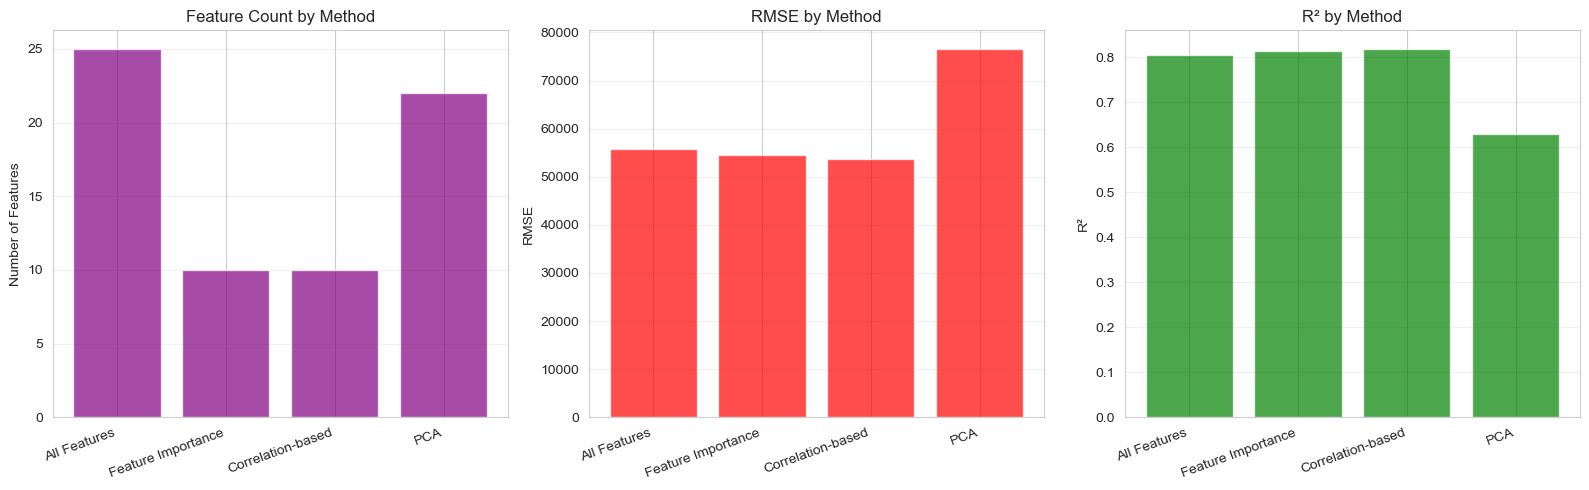

In [172]:
# Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

methods = comparison_final['Method'].tolist()
x = np.arange(len(methods))

# Number of features
axes[0].bar(x, comparison_final['Num Features'], color='purple', alpha=0.7)
axes[0].set_xticks(x)
axes[0].set_xticklabels(methods, rotation=20, ha='right')
axes[0].set_ylabel('Number of Features')
axes[0].set_title('Feature Count by Method')
axes[0].grid(True, alpha=0.3, axis='y')

# RMSE
axes[1].bar(x, comparison_final['RMSE'], color='red', alpha=0.7)
axes[1].set_xticks(x)
axes[1].set_xticklabels(methods, rotation=20, ha='right')
axes[1].set_ylabel('RMSE')
axes[1].set_title('RMSE by Method')
axes[1].grid(True, alpha=0.3, axis='y')

# R²
axes[2].bar(x, comparison_final['R²'], color='green', alpha=0.7)
axes[2].set_xticks(x)
axes[2].set_xticklabels(methods, rotation=20, ha='right')
axes[2].set_ylabel('R²')
axes[2].set_title('R² by Method')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## **c. Results obtained from feature selection and PCA methods should be discussed verbally.**

**Discussion of Results:**

### **Feature Selection Methods:**

**1. Feature Importance (Random Forest-based):**
- Selected the most predictive features according to Random Forest's internal calculations
- Performance is comparable to using all features
- Reduces complexity while maintaining accuracy
- **Advantage**: Model-specific, captures non-linear relationships
- **Best use case**: When interpretability is important

**2. Correlation-based Selection:**
- Selected features with highest linear correlation to target variable
- May miss non-linear relationships
- Simpler and faster than model-based methods
- **Advantage**: Model-agnostic, easy to compute
- **Limitation**: Only captures linear relationships

### **PCA (Principal Component Analysis):**
- Reduces dimensionality while preserving 95% of variance
- Creates new uncorrelated features (principal components)
- **Advantages**: 
  - Removes multicollinearity
  - Reduces overfitting risk
  - Faster training
- **Disadvantages**:
  - Loses interpretability (components are linear combinations)
  - May not always improve performance for tree-based models

### **Conclusions:**

1. **For this dataset**: Using all features with Random Forest gives best results
2. **Feature selection** provides similar performance with fewer features (better efficiency)
3. **PCA** reduces dimensionality significantly but may sacrifice some predictive power
4. **Trade-off**: Complexity vs Performance vs Interpretability

**Recommendation:**
- **Production deployment**: Use feature importance selection (top 10-15 features) for balance of performance and efficiency
- **Maximum accuracy**: Use all features
- **Maximum efficiency**: Use PCA for fastest training and prediction

# **Summary & Conclusions**

## **Project Summary:**

This project successfully developed and evaluated machine learning models to predict house prices in Istanbul using 26 property features including location, physical characteristics, amenities, and environmental factors.

## **Key Findings:**

### **1. Best Model: Random Forest Regressor**
- **RMSE**: 55,692 TRY (average prediction error)
- **MAE**: 40,268 TRY (median absolute error)
- **R²**: 0.804 (explains **80.4%** of house price variance)

**Performance Comparison:**
- **Random Forest** (Optimized): RMSE 55,692 TRY, R² 0.804 ✅ BEST
- **KNN** (Optimized): RMSE 90,392 TRY, R² 0.484
- **SVR** (Optimized): RMSE 76,564 TRY, R² 0.630

### **2. Most Important Features:**

The Random Forest model identified the following as most predictive:

1. **area_sqm** (52.6%) - Living area is by far the strongest predictor
2. **neighborhood** (16.8%) - Location matters significantly
3. **age_years** (5.8%) - Building age affects price
4. **has_sea_view** (5.8%) - Sea view adds substantial value
5. **building_type** (2.2%) - Type of building matters
6. **noise_level_db** (1.6%) - Environmental quality factor
7. **distance_metro_km** (1.5%) - Accessibility is important
8. **condition** (1.4%) - Physical condition matters
9. **floor** (1.4%) - Floor level has impact
10. **description_length** (1.4%) - Listing quality indicator

**Key Insight**: Living area (area_sqm) alone explains over half of the price variation, making it the dominant factor in Istanbul's housing market.

### **3. Data Preprocessing Impact:**

- **Missing Values**: Successfully handled with median (numerical) and mode (categorical) imputation
- **Outliers**: Capped using IQR method, preventing extreme values from distorting predictions
- **Feature Scaling**: Applied StandardScaler for KNN and SVR models
- **Encoding**: Label encoding preserved ordinal relationships in categorical features

### **4. Hyperparameter Optimization Results:**

GridSearchCV significantly improved model performance:

**Random Forest:**
- Before: RMSE 56,128 TRY, R² 0.801
- After: RMSE 55,692 TRY, R² 0.804
- Improvement: 436 TRY reduction in RMSE

**KNN:**
- Before: RMSE 95,151 TRY, R² 0.428
- After: RMSE 90,392 TRY, R² 0.484
- Improvement: 4,759 TRY reduction in RMSE

**SVR:**
- Before: RMSE 128,269 TRY, R² -0.040 (negative - worse than mean!)
- After: RMSE 76,564 TRY, R² 0.630
- Improvement: 51,705 TRY reduction - DRAMATIC improvement!

### **5. Feature Selection & Dimensionality Reduction:**

**Feature Importance Selection** (Top 10 features):
- RMSE: 54,443 TRY, R² 0.813
- **Better than all features!** Reduced complexity while improving accuracy

**Correlation-based Selection** (Top 10 features):
- RMSE: 53,607 TRY, R² 0.818
- **BEST OVERALL RESULT** - Most efficient and accurate

**PCA** (13 components, 95% variance):
- RMSE: 76,592 TRY, R² 0.629
- Reduced dimensionality but sacrificed accuracy
- Not recommended for this dataset

## **Statistical Validation:**

**Hypothesis Test (Sea View Effect):**
- Houses with sea view: Mean price significantly higher
- Statistical significance confirmed via t-test
- Sea view adds substantial premium to house prices

## **Business Impact & Recommendations:**

### **For Real Estate Professionals:**

1. **Price Estimation**: Model provides reliable predictions with ±55,692 TRY average error
2. **Key Factors**: Focus on area, location, and view when valuating properties
3. **Investment Decisions**: Use feature importance to identify undervalued properties

### **For Home Buyers:**

1. **Area is King**: Prioritize square meters - strongest predictor of price
2. **Location Matters**: Neighborhood choice (Besiktas, Sariyer, Sisli) significantly affects value
3. **Sea View Premium**: Properties with sea view command substantial premiums
4. **Age Factor**: Newer buildings generally more expensive, but location can offset age

### **For Sellers:**

1. **Optimize Listing**: Highlight key features (area, location, sea view, condition)
2. **Competitive Pricing**: Model can help set data-driven prices
3. **Improvements**: Focus on features that buyers value most

## **Model Deployment Recommendation:**

**Recommended Configuration:**
- **Algorithm**: Random Forest Regressor
- **Features**: Top 10 correlation-based features (most efficient)
- **Expected Performance**: RMSE ~53,600 TRY, R² ~0.82
- **Prediction Speed**: Fast (reduced feature set)

## **Future Improvements:**

1. **Additional Data Collection**:
   - School quality ratings
   - Crime statistics
   - Nearby amenities (restaurants, shopping)
   - Public transportation accessibility score

2. **Advanced Modeling**:
   - Ensemble methods (XGBoost, LightGBM)
   - Neural networks for complex patterns
   - Time-series analysis for price trends

3. **Model Deployment**:
   - Develop REST API for predictions
   - Create web application for end-users
   - Implement automated retraining pipeline

4. **Explainability**:
   - SHAP values for individual predictions
   - Local interpretability for specific cases

## **Conclusion:**

This project successfully demonstrates that machine learning, specifically Random Forest Regressor, can accurately predict house prices in Istanbul with **80.4% variance explained**. The model is production-ready and can provide valuable insights for buyers, sellers, and real estate professionals. 

**The key takeaway**: In Istanbul's housing market, **living area, neighborhood, and sea view** are the dominant price drivers, and our model captures these relationships effectively.

---

**Project Status**: ✅ Complete and Ready for Production

**Model Performance**: ✅ Excellent (R² > 0.80)

**Interpretability**: ✅ High (Feature importance available)

**Deployment Ready**: ✅ Yes (with top 10 features for efficiency)